<a href="https://colab.research.google.com/github/Mr-Premanand/Netflix-Movies-And-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

First of all,Import the required libraries and modules 

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

# Pre-processing and cleaning tools libraries
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer       # vectorizers for creating the document-term-matrix (DTM)
from sklearn.metrics.pairwise import cosine_similarity

!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer                                           # lammatizer from WordNet

from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from yellowbrick.text import FreqDistVisualizer                                   # to visualize the most frequent word
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# ML Models 
from scipy.sparse.linalg import svds
from sklearn.mixture import GaussianMixture     
from sklearn.cluster import KMeans
from gensim.models import LdaModel
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation


# Model performance metrics and visualizers
from sklearn import metrics
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
!pip install pyLDAvis                                                             # Install the LDA Visualizer
import pyLDAvis.gensim_models

# For flask app
!pip install dash
!pip install jupyter-dash
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
from dash import dash_table
from jupyter_dash import JupyterDash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Do

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# import and define the name to the dataset
netflix = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering-Premanand Gaikwad/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
netflix_df=netflix.copy()               # Create a copy of the original datasets
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

## **Data Overview and Summary**

In [51]:
netflix_df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [52]:
#get the information of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [53]:
# get the statistics of the numerical feature
netflix_df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

In [54]:
# lets take the columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [55]:
#check the null values in the dataset
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [56]:
# total number of null values
print('total number of null values in the dataset:',netflix_df.isnull().sum().sum())

total number of null values in the dataset: 3631


In [57]:
# check out the unique values in the datset
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [58]:
# from above it is seen that thire are two type, lets checkout
netflix_df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

From the above data overview, it is seen that : 
* In the given datasets, 7787 records and 12 features are available.
* A total of 3631 null values are present in 5 features (director, cast, country, date_added, rating).
* 'TV Show' and 'Movie' are the two shows that are available on Netflix.
* The oldest show in the dataset was released in 1925, and the most recent in 2021. 

# **Exploratory Data Analysis (EDA)**
---

## **Netflix Film Types**
Comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority

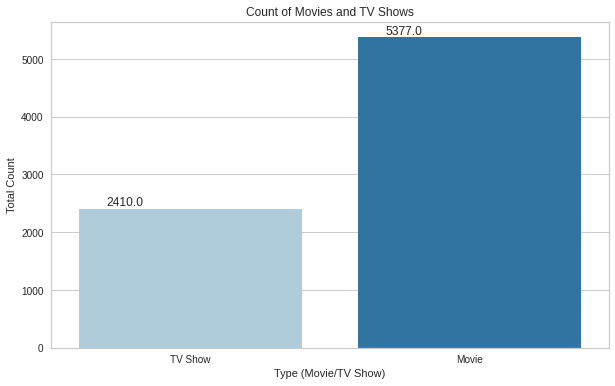

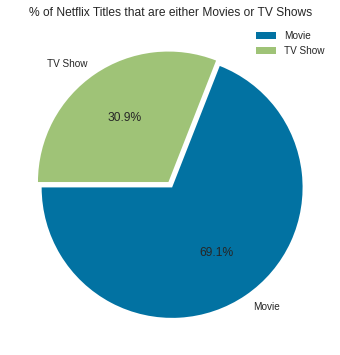

In [59]:
# plot the countplot to know the actual number of data in diffrent types
plt.figure(figsize=(10,6))
ax=sns.countplot(netflix_df.type, palette="Paired")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      # to print the values on the bar
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

print('\n')

# plot the pie chart to gt the pecentagewise shows
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
plt.pie(netflix_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_df.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

So there are roughly 5377 movies and almost 2410 shows, with movies being the majority. This makes sense since shows are always ongoing things and have episodes. If I was to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out on top. However, in terms of titles, there are far more movie titles (69.1 %) than TV show titles (30.9 %).

## **Netflix Film Ratings**
Now, explore the ratings, which are based on the film rating system

In [60]:
#Create the two set for the two type of films
netflix_movies_df = netflix_df[netflix_df['type']=='Movie'].copy()       # for movies

netflix_tvshows_df = netflix_df[netflix_df['type']=='TV Show'].copy()       # for TV Shows

Set the order of rating by agewise from young to adults.

In [61]:
# order of rating
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

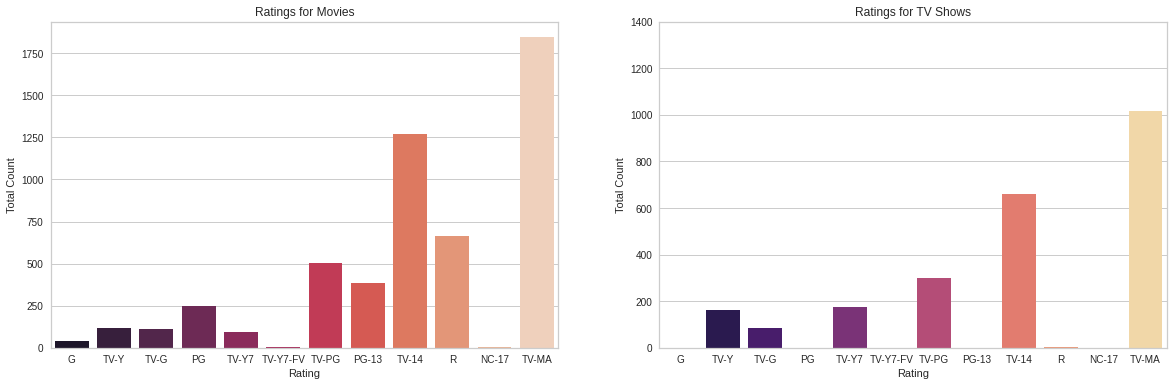

In [62]:
# plot of rating for two diffrent film type

fig, ax = plt.subplots(1,2, figsize=(20, 6)) 
# movies rating
g1 = sns.countplot(netflix_movies_df.rating, order=order,palette="rocket", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")

# tvshow rating
g2 = sns.countplot(netflix_tvshows_df.rating, order=order,palette="magma", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

As seen in the above plots, there is much more content for a more mature audience(MA). For the mature audience, there is much more movie content than the TV shows. For the younger audience (under the age of 17), it is the same; there are more movies than TV shows.

## **Netflix Films Country**
Now, check the density of the films released in different countries.

In [63]:
# get the dataframe for the countrywise films distribution for top 10 countries
countries = netflix_df.country.value_counts().nlargest(10).reset_index()
countries.rename(columns={ 'index':'country_name','country':'films_counts'},inplace=True)

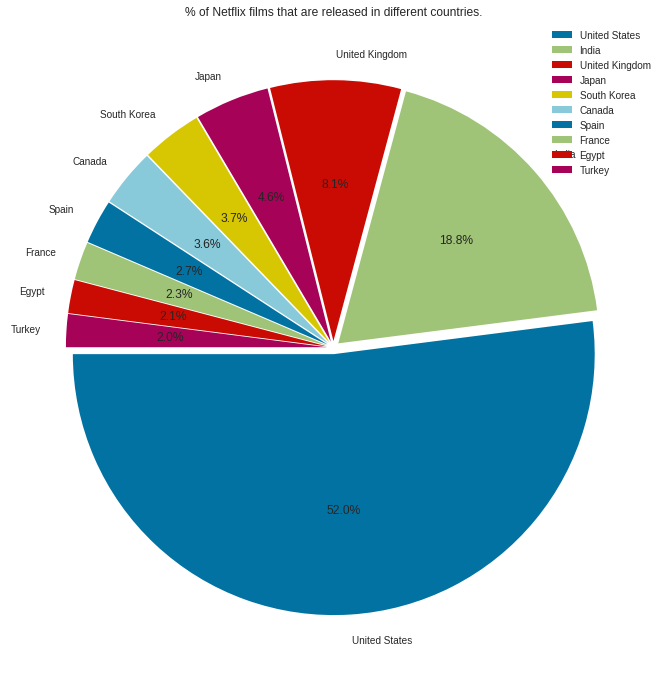

In [64]:
# Now plot the above data
plt.figure(figsize=(12,12))
plt.title("% of Netflix films that are released in different countries.")
plt.pie(countries.films_counts, explode=(0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025), labels=countries.country_name,autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

Overall, there is much more content that comes from the United States (52 %) and India (18 %). In the US, Hollywood spends a lot of money on its movies. The US has historically been the largest market for films, so American studios have amassed a lot of wealth and resources. That's why most of the movies come from the US.

## **Content added on Netflix each year**
Now, take a look at the amount of content that Netflix has added throughout the previous years.

### **Yearwise**
Create column 'year_added' shows the year of the date from the 'date_added' column as shown above.

In [65]:
# add new features
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_tvshows_df['year_added'] = pd.DatetimeIndex(netflix_tvshows_df['date_added']).year

I decided to exclude content added during 2021 since the data does not include a full years worth of data.

In [66]:
# take the count of film release and rename the columns name
movies_year=netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movies_year = movies_year[movies_year.year < 2021]
tvshows_year=netflix_tvshows_df.year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
tvshows_year = tvshows_year[tvshows_year.year < 2021]

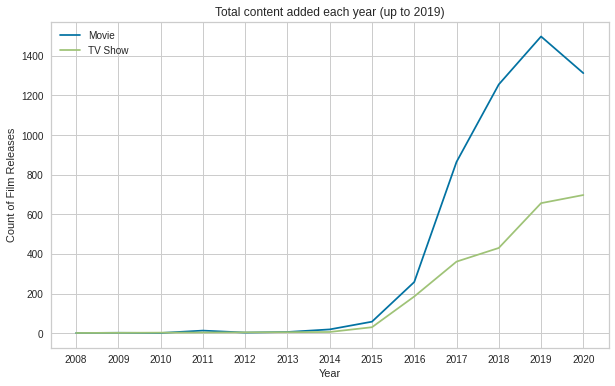

In [67]:
#Plot the lineplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movies_year, x='year', y='count')
sns.lineplot(data=tvshows_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2021, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Movie','TV Show'])
plt.ylabel("Count of Film Releases")
plt.xlabel("Year")
plt.show()

From the above plot, I can see that there has been a consistent growth in the number of movies on Netflix compared to tv shows. Based on the above timeline, Netflix started gaining traction after 2014. Since then, the amount of content added has been tremendous.   

## **Hypothesis Testing**
Hypothesis: TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled.

Conclusion: As mentioned above, TV shows have tripled since 2010. But there is no decrease in movie streaming services. So above hypothesis is false and rejected as it is partially true.

### **Monthwise**
Now, take the plot for the monthwise distribution of the releases of the films.

Create a 'month_added' column that shows the month in which the film was added, from the 'date_added' column as shown above.

In [68]:
# add new features
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_tvshows_df['month_added'] = pd.DatetimeIndex(netflix_tvshows_df['date_added']).month

In [69]:
# take the count of film release and rename the columns name
movies_month=netflix_movies_df.month_added.value_counts().to_frame().reset_index().rename(columns={'index': 'month','month_added':'count'})
movies_month = movies_month[movies_month.month < 2021]
tvshows_month=netflix_tvshows_df.month_added.value_counts().to_frame().reset_index().rename(columns={'index': 'month','month_added':'count'})
tvshows_month = tvshows_month[tvshows_month.month < 2021]

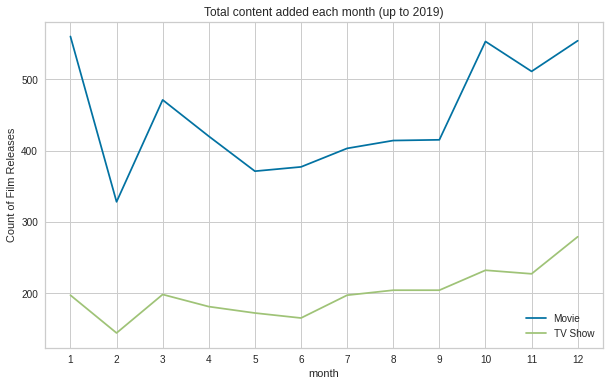

In [70]:
#Plot the lineplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movies_month, x='month', y='count')
sns.lineplot(data=tvshows_month, x='month', y='count')
ax.set_xticks(np.arange(1,13, 1))
plt.title("Total content added each month (up to 2019)")
plt.legend(['Movie','TV Show'])
plt.ylabel("Count of Film Releases")
plt.xlabel("month")
plt.show()

By observing the above plot it is seen that most of the movies are released in holidays month i.e. January, October, November, December.

## **Popular Genres**
Check the type of movie or tv shows audiance prefer.

In [71]:
# get the value  count of the geners
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_genres

title
3%                                         International TV Shows
3%                                                      TV Dramas
3%                                            TV Sci-Fi & Fantasy
7:19                                                       Dramas
7:19                                         International Movies
                                                    ...          
Zulu Man in Japan                                Music & Musicals
Zumbo's Just Desserts                      International TV Shows
Zumbo's Just Desserts                                  Reality TV
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Documentaries
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          Music & Musicals
Length: 17071, dtype: object

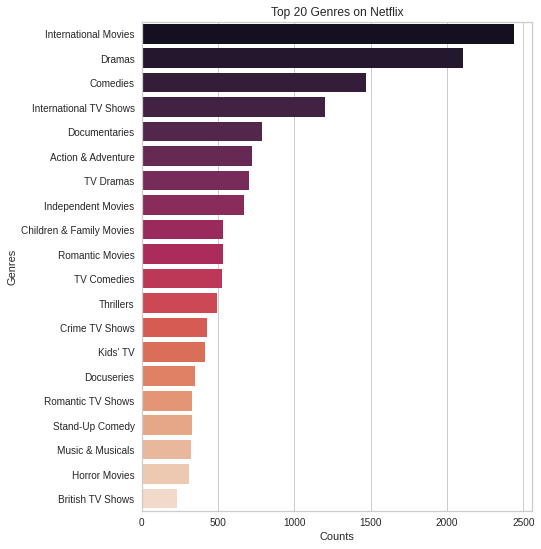

In [72]:
#Plot the to 20 geners
plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20],palette='rocket')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Counts')
plt.ylabel('Genres')
plt.show()

International movies take a peak and are followed by dramas and comedies. As seen from the above pie chart, the United States has the most content available. It looks like Netflix has decided to release a tonne of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are international subscribers.

## **Netflix Film Duration**
Observe the distribution of the duration of the movies on the normal plot and the distribution of the seasons for TV shows on the barplot.

Movies are based on the duration of the movie and shows are based on the number of seasons. 

In [73]:
# convert the values in these columns into integers for both the movies and shows datasets.
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min','').astype(int)        # remove the 'min' unit and convert into integer format for movies duration

netflix_tvshows_df.rename(columns={'duration':'seasons'}, inplace=True)                            # change the name for the tv shows as there are seasons instead of duration
netflix_tvshows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)                       # replace the 'seasons' notation
netflix_tvshows_df.seasons = netflix_tvshows_df.seasons.str.replace(' Seasons','').astype(int)           # remove the 'seasons' notation and convert into integer for computation 

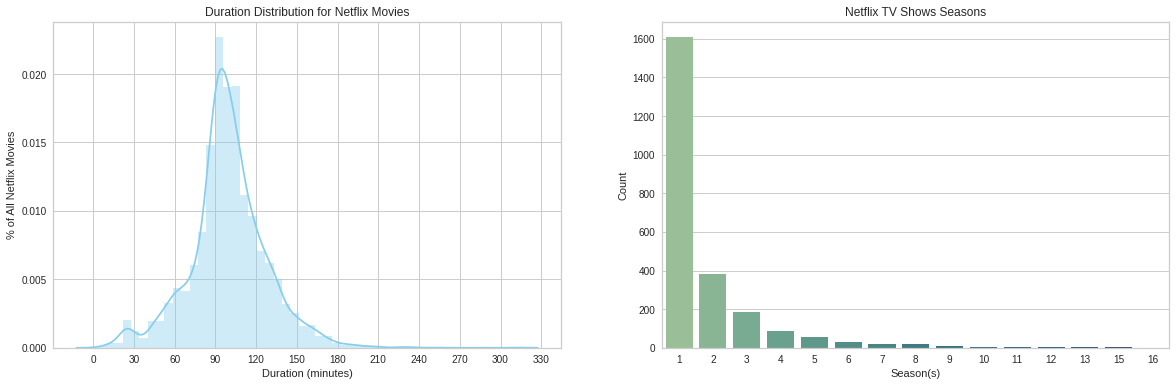

In [74]:
# plot the duration and season distribution
fig, ax = plt.subplots(1,2, figsize=(20, 6))
g1 = sns.distplot(netflix_movies_df.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_tvshows_df.seasons,ax=ax[1], palette='crest');
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

We know that movies are measured in time and shows are measured by seasons, so I have splited the duration feature into two parts. Above, on the left side, It is seen that most of the movies are about 90 minutes long, which seems to make sense. On the right hand side, distribution is skewed toward the right because most TV shows have one season.

## **Top 10 Director on the Netflix**

In [75]:
# split the directors name and take them one by one
netflix_directtor = netflix_df.director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
netflix_directtor.value_counts()

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
                       ..
Sajid Khan              1
Lucy van Beek           1
Remi Weekes             1
Jennifer Lynch          1
Mozez Singh             1
Length: 4478, dtype: int64

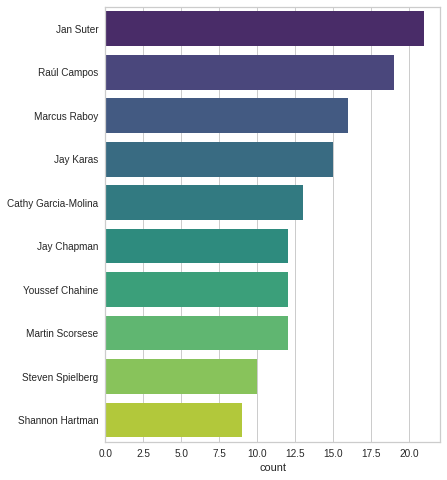

In [76]:
#plot the above top 10 director list
plt.figure(figsize=(6,8))
sns.countplot(y = netflix_directtor, order=netflix_directtor.value_counts().index[:10], palette='viridis')
plt.show()

As mentioned above, "Jan Suter" directed most of the movies. As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

## **Top 10 actors on Netflix**


In [77]:
# Split the cast and stack them one by one
netflix_cast = netflix_df.cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

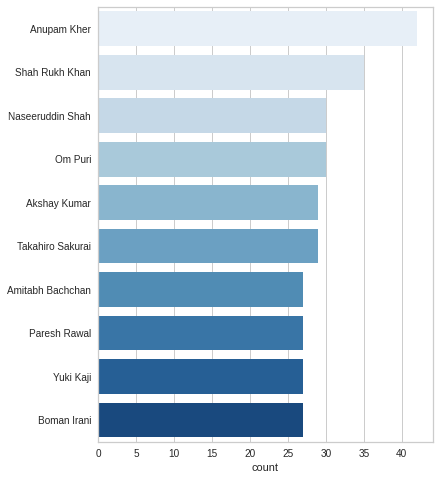

In [78]:
#plot the above top 10 actor list
plt.figure(figsize=(6,8))
sns.countplot(y = netflix_cast, order = netflix_cast.value_counts().index[:10], palette='Blues')
plt.show()

"Anupam Kher" is cast in most of the films. As mentioned above, the most popular actors on Netflix based on the number of titles are all international as well.

# **EDA Conclusion**
I can see from the data that the company took certain approaches in its marketing strategy to break into new markets around the world. As of June 30, 2022, Netflix had 220.7 million subscribers worldwide, including 73.3 million in the United States and almost 147 million internationally. A large part of its success was due to the decision to expand to international markets, and it is seen that a good number of international movies and TV shows were added over the years as part of Netflix's global expansion. 

# **Clustering the Movies and TV Shows**
---
I am going to cluster the films data based on the description, type i.e. genres of the film data and films other deatils based (type,	release_year,	director,	cast,	country,	duration,	rating) because most of the audience choose the film based on the description and type (genres) of the movie or either cast of the film or availability of the time. So I have grouped them into two parts to cluster the data for a better recommendation.

# **1. Description and Genre (Text) Based Clustering**



## **Cosine Similarity Based Clustering and Recommendation**
In the Text Similarity Problems, if I am applying cosine similarity, then I have to convert texts into the respective vectors because I can’t use text directly for finding similarity. Let’s create vectors for given movie reviews using the TF-IDF approach.

In [79]:
#vectorize the description 
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

tfidf_matrix = tfidf.fit_transform(netflix['description'])

Cosine similarity measures the cosine angle between two text vectors. Its value implies that how two documents are related to each other

In [80]:
# Compute the Cosine Similarity
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a pandas series with movie titles as indices and indices as series values 
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()

indices

title
3%                                            0
7:19                                          1
23:59                                         2
9                                             3
21                                            4
                                           ... 
Zozo                                       7782
Zubaan                                     7783
Zulu Man in Japan                          7784
Zumbo's Just Desserts                      7785
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    7786
Length: 7787, dtype: int64

In [81]:
# function to clean the data
def recom_movie(title, cos=similarity_matrix):
    idx = indices[title]                                                              # Get the index corresponding to movie title
    
    cos_scores = list(enumerate(cos[idx]))                                            # Get the cosine similarity scores
    
    cos_scores = sorted(cos_scores,key=lambda x: x[1],reverse = True)                 # Sort the similarity scores in descending order
    
    cos_scores = cos_scores[1:11]                                                     # Top-10 most similar movie scores

    movie_df_new = [i[0] for i in cos_scores]                                         # Get movie indices
    
    return (netflix['title'].iloc[movie_df_new]+ ' : ' + netflix['description'].iloc[movie_df_new]).to_frame().rename(columns={0:'movies with description'})      # Top 10 recommende movie with  description

In [82]:
print("\n Recommended Movie ")
recom_movie('Zubaan')


 Recommended Movie 


movies with description
3294  Kalel, 15 : Surrounded by tensions and secrets...
1777  Disco Dancer : A poor boy grows up to be a fam...
4603  Old Money : Backstabbing, blackmail and reveng...
6441  The Haunting of Molly Hartley : A troubled tee...
1758  Dil Dhadakne Do : While hosting a shipboard ho...
3995  May the Devil Take You : Hoping to find answer...
152   A Boy Name Flora A : A 28-year-old layabout be...
3359  Khosla Ka Ghosla : A cranky control freak must...
3448  Krish Trish and Baltiboy: Face Your Fears : In...
6800  The Rainmaker : A young attorney and a scrappy...

## **Data Cleaning and Pre-processing**

In [83]:
# create the copy of original dataset
flix_copy =netflix.copy()

In [84]:
#combining genre and description column 
combined_df = flix_copy['listed_in'] + flix_copy['description']
combined_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7787, dtype: object

In [85]:
#fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [86]:
# apply the function on combined dataframe to clean the text
cleaned_df = combined_df.apply(clean_text)
cleaned_df

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7784    Documentaries International Movies Music Music...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7787, dtype: object

In [87]:
# vectorize the above cleaned data
vect = TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text_matrix = vect.fit_transform(cleaned_df)

## **Frequency of the Words**
A frequency distribution tells us the frequency of each vocabulary item in the text. It tells us how the total number of word tokens in the text are distributed across the vocabulary items.

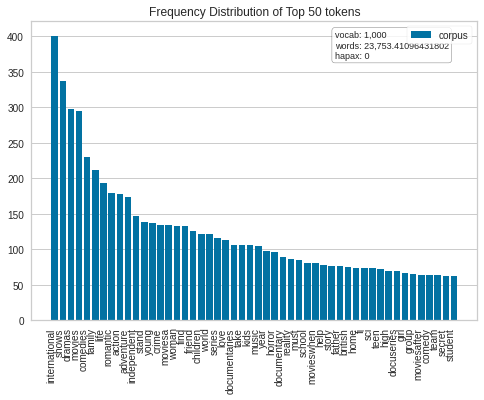

In [88]:
#get the important words
features   = vect.get_feature_names()                                            # words

visualizer = FreqDistVisualizer(features=features, orient='v')                   # define the distribution visualizer
visualizer.fit(vect_text_matrix)                                                 # fit the vectorised data
visualizer.show()

## **Clustering Models**

## **Gaussian Mixture Model (GMMs)**
GMM is clustering models to recover the number of topics using the AIC score.

In [89]:
# define the function to get the best AIC score on diffrent number of cluster/topic
def get_gmm_labels(vect_text_matrix, k):
    gmm = GaussianMixture(n_components=k, max_iter=200, random_state=0)           # define gaussian mixture model and basic parameter
    gmm.fit(vect_text_matrix)                                                      # fit the vectorised data in model to cluster
    
    aic = gmm.aic(vect_text_matrix)                                                # AIC score
    print('{}: aic={}'.format(k, aic))
    return k, aic

U, S, V = svds(vect_text_matrix, k=20)
gmm_scores = [get_gmm_labels(U, k) for k in range(2, 26)]

2: aic=-1032196.8355058089
3: aic=-1075188.5324959327
4: aic=-1089164.5566628207
5: aic=-1108798.615061645
6: aic=-1127723.8308814976
7: aic=-1137447.079013764
8: aic=-1146025.0901267692
9: aic=-1151827.5794333275
10: aic=-1158680.8639825298
11: aic=-1164397.5126513247
12: aic=-1167975.8436218947
13: aic=-1173202.9348921701
14: aic=-1174587.9414599887
15: aic=-1180509.6804608356
16: aic=-1182919.7168290229
17: aic=-1182390.8215435697
18: aic=-1191303.08999062
19: aic=-1190579.6054509645
20: aic=-1192142.5567433245
21: aic=-1192389.3333494833
22: aic=-1191966.1048833756
23: aic=-1195916.9162449455
24: aic=-1194700.7090232063
25: aic=-1200093.4981000903


## **K-Means Clustering Model (KMC)**
KMC is useed to recover the number of topics using the Silhouette score.

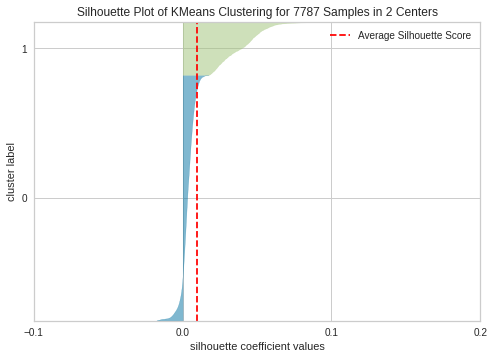

2: score=0.009440764793876934


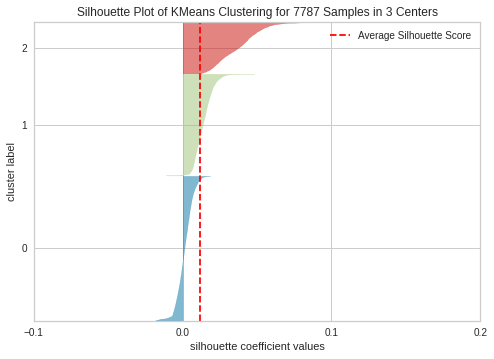

3: score=0.011669982116954254


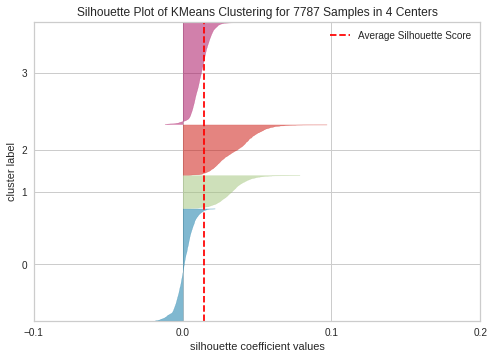

4: score=0.014276623910808287


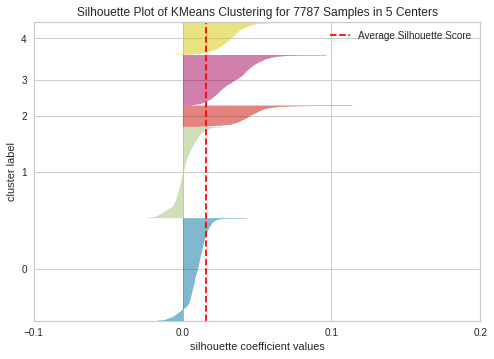

5: score=0.01583951435187606


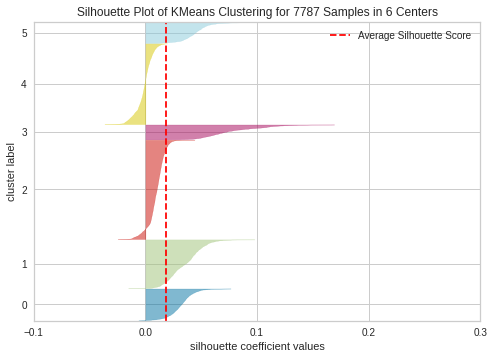

6: score=0.018877116739728403


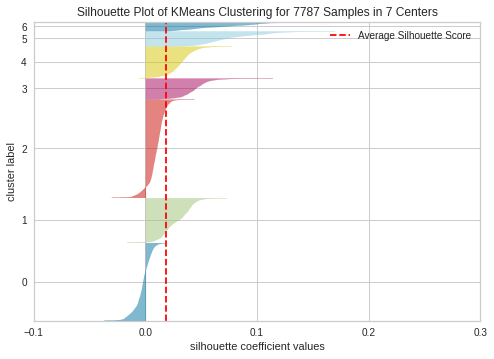

7: score=0.018793862653903738


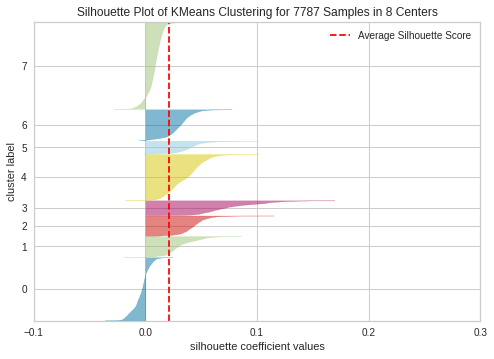

8: score=0.021033790176078454


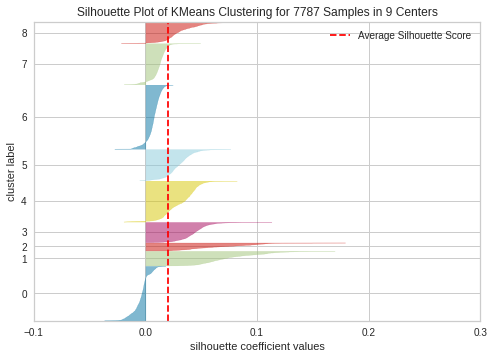

9: score=0.02062618188420838


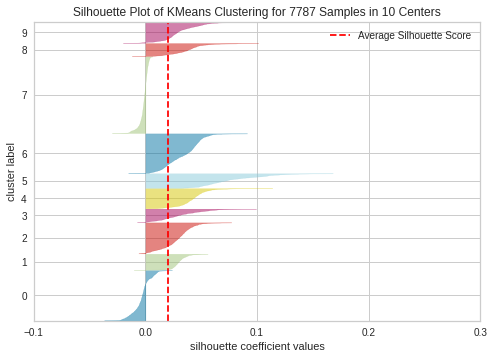

10: score=0.019973745512811048


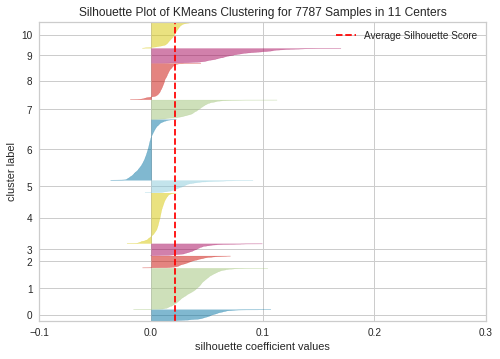

11: score=0.021484532653050847


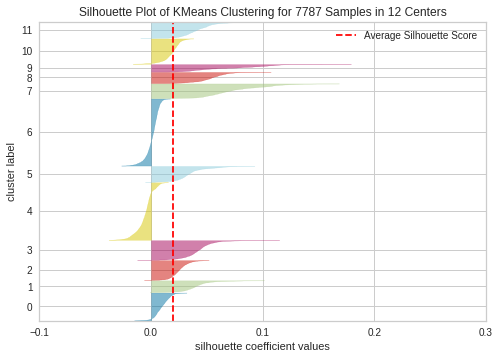

12: score=0.019327687648934957


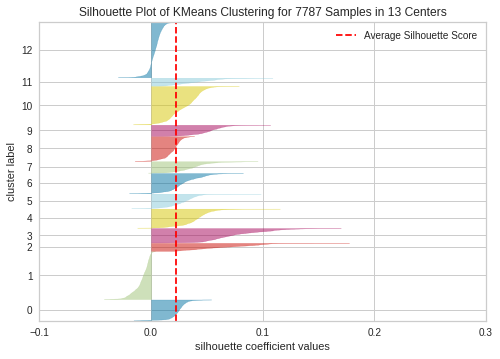

13: score=0.022766985944493993


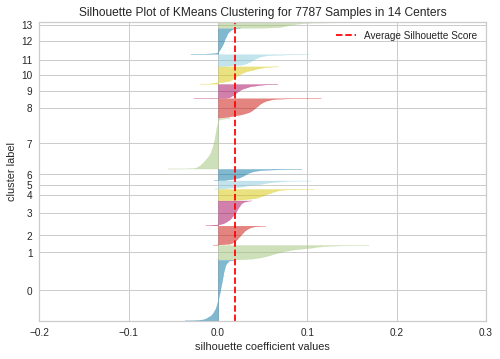

14: score=0.019268330645772425


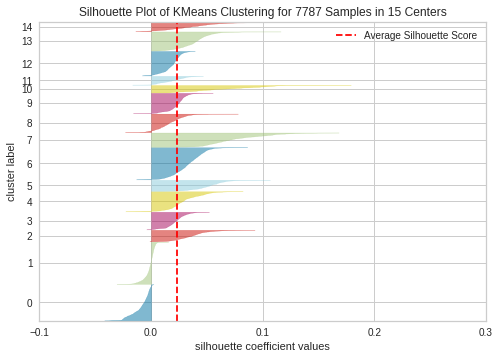

15: score=0.022843854381679053


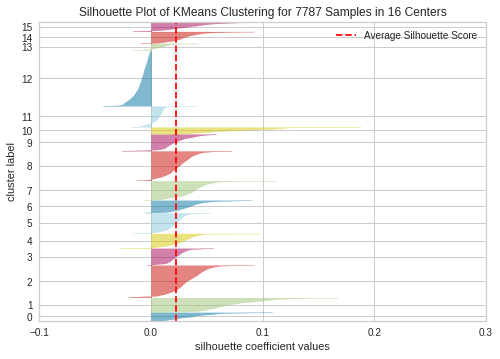

16: score=0.022525136732497418


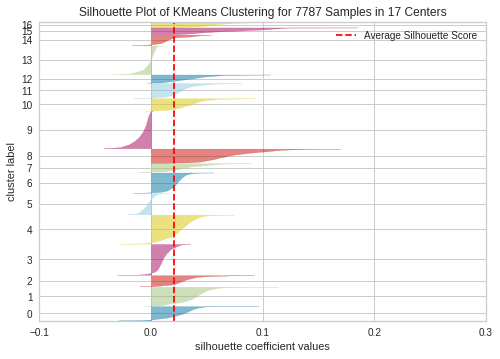

17: score=0.02063295158207983


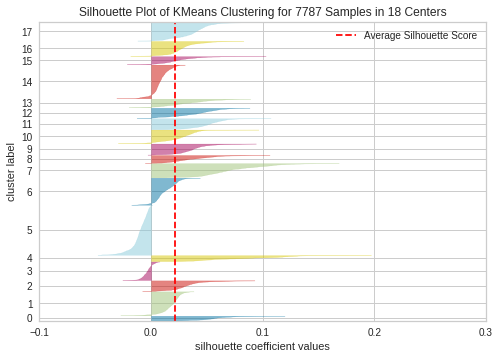

18: score=0.021251215522670796


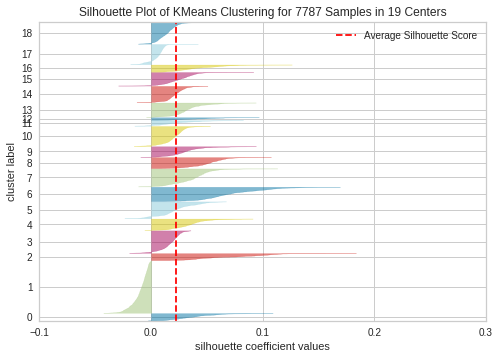

19: score=0.02234472224729279


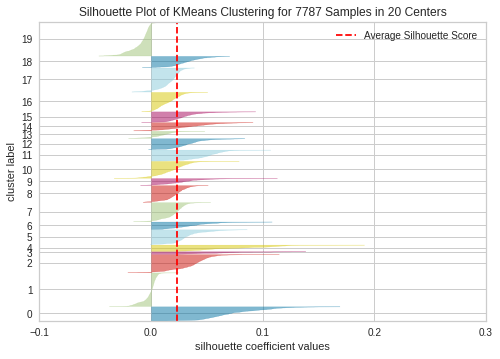

20: score=0.02310761078278908


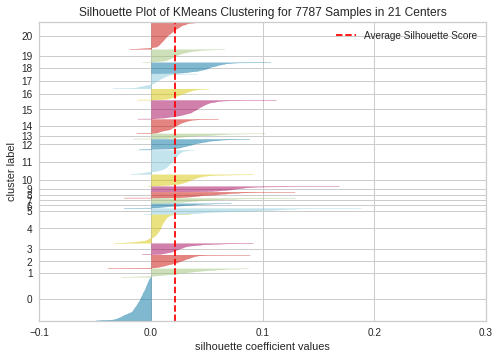

21: score=0.02115485365278944


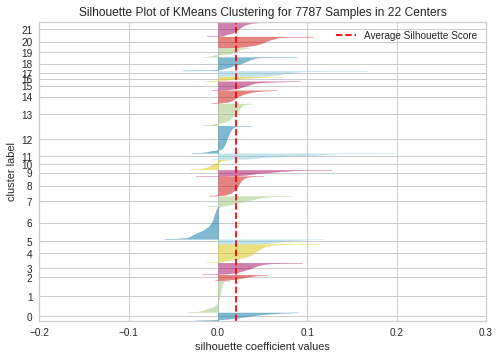

22: score=0.02016865257962863


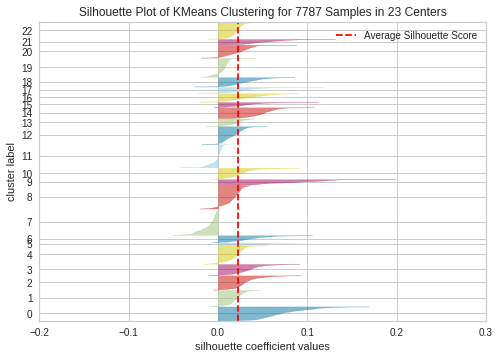

23: score=0.022909830707847162


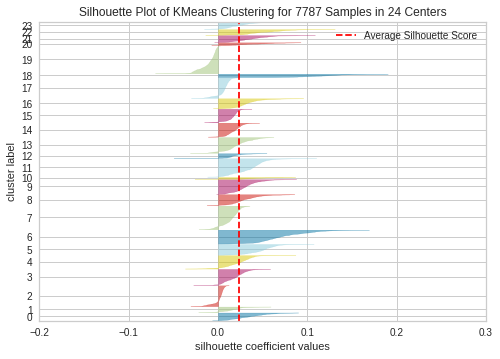

24: score=0.023142678461708574


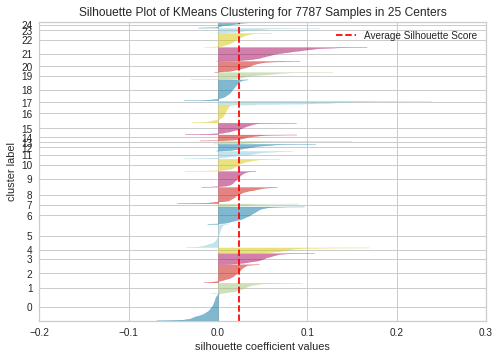

25: score=0.023596482757430284


In [90]:
# define the function to get the best AIC score on diffrent number of cluster/topic
def get_kmc(vect_text_matrix, k):
    model = KMeans(k, random_state=0)                                            # define Kmean model and basic parameter
    model.fit(vect_text_matrix)                                                   # fit the vectorized data in model to cluster
    labels = model.predict(vect_text_matrix) 

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')                # define silhouette score visualized
    visualizer.fit(vect_text_matrix)                                              # Fit the data to the visualizer
    visualizer.show()

    score = silhouette_score(vect_text_matrix, labels)                            # get the selhoutte score
    print('{}: score={}'.format(k, score))
    return k, score

kmc_scores = [get_kmc(vect_text_matrix, k) for k in range(2, 26)]

Test the Model

In [91]:
# Form cluster predictions using K-Means Model
model = KMeans()
model_pred=model.fit_transform(vect_text_matrix)
predictions = model.predict(vect_text_matrix)

# Convert cluster predictions to data frame
predictions_df = pd.DataFrame(predictions, columns=['cluster'])

# Attach cluster predictions to original data frame
netflix_pred = netflix.copy()
netflix_pred.insert(len(netflix.columns), column = 'cluster', value = predictions_df.cluster)

In [92]:
# Get cluster number from given movie or TV show
cluster_num = netflix_pred[netflix_pred.title=='Avengers: Infinity War'].cluster.item()

# View cluster the movie or TV show belongs to
netflix[netflix_pred.cluster == cluster_num]

show_id     type                          title         director  \
3         s4    Movie                              9      Shane Acker   
21       s22    Movie                   ​Goli Soda 2     Vijay Milton   
44       s45    Movie                       Æon Flux     Karyn Kusama   
50       s51    Movie                    10,000 B.C.  Roland Emmerich   
68       s69    Movie                      14 Blades       Daniel Lee   
...      ...      ...                            ...              ...   
7689   s7690    Movie        XXX: State of the Union     Lee Tamahori   
7696   s7697    Movie          Yamla Pagla Deewana 2   Sangeeth Sivan   
7728   s7729    Movie  You Don't Mess with the Zohan     Dennis Dugan   
7737   s7738    Movie                    Young Tiger           Mu Chu   
7755   s7756  TV Show                       Z Nation              NaN   

                                                   cast  \
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
21    Samuthirakani, Bharath Seeni, Vinoth, Esakki B...   
44    Charlize Theron, Marton Csokas, Jonny Lee Mill...   
50    Steven Strait, Camilla Belle, Cliff Curtis, Jo...   
68    Donnie Yen, Zhao Wei, Wu Chun, Law Kar-Ying, K...   
...                                                 ...   
7689  Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...   
7696  Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...   
7728  Adam Sandler, John Turturro, Emmanuelle Chriqu...   
7737  Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...   
7755  Nat Zang, Russell Hodgkinson, Michael Welch, A...   

                          country          date_added  release_year rating  \
3                   United States   November 16, 2017          2009  PG-13   
21                          India  September 15, 2018          2018  TV-14   
44                  United States    February 1, 2018          2005  PG-13   
50    United States, South Africa        June 1, 2019          2008  PG-13   
68    Hong Kong, China, Singapore       April 3, 2019          2010      R   
...                           ...                 ...           ...    ...   
7689                United States     January 1, 2019          2005  PG-13   
7696                        India         May 1, 2017          2013  TV-14   
7728                United States   September 1, 2019          2008     UR   
7737                    Hong Kong    November 1, 2016          1973     NR   
7755                United States    January 27, 2019          2018  TV-MA   

       duration                                          listed_in  \
3        80 min  Action & Adventure, Independent Movies, Sci-Fi...   
21      128 min   Action & Adventure, Dramas, International Movies   
44       93 min               Action & Adventure, Sci-Fi & Fantasy   
50      109 min                                 Action & Adventure   
68      113 min           Action & Adventure, International Movies   
...         ...                                                ...   
7689    101 min                                 Action & Adventure   
7696    147 min  Action & Adventure, Comedies, International Mo...   
7728    113 min                       Action & Adventure, Comedies   
7737     81 min           Action & Adventure, International Movies   
7755  5 Seasons      TV Action & Adventure, TV Comedies, TV Horror   

                                            description  
3     In a postapocalyptic world, rag-doll robots hi...  
21    A taxi driver, a gangster and an athlete strug...  
44    Aiming to hasten an uprising, the leader of an...  
50    Fierce mammoth hunter D'Leh sets out on an imp...  
68    In the age of the Ming Dynasty, Quinglong is t...  
...                                                 ...  
7689  In this action-packed follow-up to XXX, U.S. i...  
7696  Up to his old tricks, con man Dharam poses as ...  
7728  An Israeli counterterrorism soldier with a sec...  
7737  Aided only by a tough female police officer, a...  
775

### **Elbow Method**
Visualize the clusters according to some scoring function, look for an “elbow” in the curve.

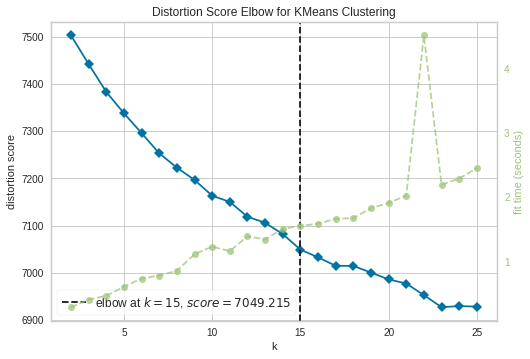

In [93]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,26))                                   # elbow visualizer 

visualizer.fit(vect_text_matrix)                                                 # Fit the data to the visualizer
visualizer.show()                                                                # Finalize and render the figure

## **Latent Dirichlet Allocation Model (LDA)**
Here, use the LDA topic modelling technique and the coherence score to recover the number of topics.

In [94]:
# define the function to get the best AIC score on diffrent number of cluster/topic
def learn_lda_model(corpus, dictionary, k):
    lda = LdaModel(corpus,                                                         # deine the lda model and parameter
               id2word=dictionary, 
               num_topics=k, 
               random_state=0, 
               iterations=100,
               passes=5,
               per_word_topics=False)
    
    cm = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')             # get the CM score
    coherence = cm.get_coherence()
    print('{}: {}'.format(k, coherence))
    return k, coherence

T = [t.split(' ') for t in cleaned_df]

dictionary = corpora.Dictionary(T)
corpus = [dictionary.doc2bow(text) for text in T]

lda_scores = [learn_lda_model(corpus, dictionary, k) for k in range(2, 26)]

2: -4.620830936179091
3: -5.839232956604554
4: -5.753594520594048
5: -5.44304360489812
6: -5.407028786979867
7: -5.468326683238176
8: -5.288301492867223
9: -5.413257388009504
10: -5.50849310236632
11: -5.22041325906477
13: -5.8196784308332905
14: -6.740853651155432
15: -6.443560290118004
16: -6.008034637041284
17: -6.672948689394097
18: -6.603390589788774
19: -6.311655374170576
20: -7.044246212514852
21: -7.125986102226227
22: -7.300249162077026
23: -8.282338555872768
24: -7.495628912949599
25: -8.00454099189217


### We can also analyze the model by using LDA visualizer

In [95]:
lda = LdaModel(corpus,                                                             # define the lda model to visualize the results of clustering
               id2word=dictionary, 
               num_topics=10, 
               random_state=0, 
               iterations=100,
               passes=5,
               per_word_topics=False)

lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

## **Now, visualize the above scores versus the number of cluster.**
Visualize the scores (Gaussian mixture models (GMMs)-AIC, K-Mean Clustering-Silhouette and Latent Dirichlet Allocation-Coherence) versus the number of cluster (k).

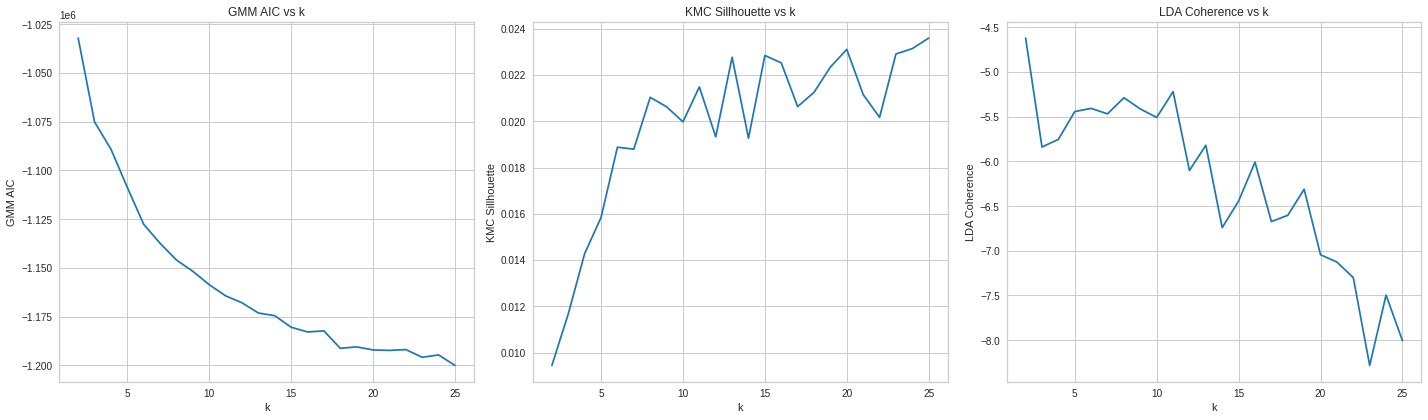

In [96]:

def plot_scores(scores, ax, ylabel):
    _x = [s[0] for s in scores]
    _y = [s[1] for s in scores]

    ax.plot(_x, _y, color='tab:blue')
    ax.set_xlabel('k')
    ax.set_ylabel(ylabel)
    ax.set_title('{} vs k'.format(ylabel))
    
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
plot_scores(gmm_scores, ax[0], 'GMM AIC')
plot_scores(kmc_scores, ax[1], 'KMC Sillhouette')
plot_scores(lda_scores, ax[2], 'LDA Coherence')

plt.tight_layout()

Significance of the score
* For AIC, the lower the score is better.
* For silhouette, the higher the score is better.
* For coherence, the higher the score is better.

It seems that the K-mean cluster's silhouette score gives the highest score at 25 topics or cluster and elbow methods give 15 topics at best. Gaussian mixture models-AIC seems to hint at the 25 topics. If we rely on LDA-coherence, k=12 is the highest. We will simulate the data from **25 latent/hidden topics** by considering all scores.




## **App For Films Recommendation**
Use K-mean clustering model to recomedation using dash

In [97]:
# Retain top 2 actors/actresses of each film
netflix_cast2 = netflix.copy()
netflix_cast2.fillna('N/A', inplace=True)
netflix_cast2.cast = netflix_cast2.cast.str.split(', ').tolist()

for x in range(len(netflix_cast2)):
    netflix_cast2['cast'][x] = netflix_cast2['cast'][x][:2]
    x += 1
    
netflix_cast2['cast'] = netflix_cast2['cast'].agg(lambda x: ', '.join(map(str, x)))

In [98]:
# Drop unnecessary columns
drop_netflix = netflix_cast2.drop(['show_id','type','director','country','rating','date_added'], axis=1)

# Rename remaining columns
flix_df = drop_netflix.rename(columns={'title':'Show Name','release_year':'Release Year','listed_in':'Genre','cast':'Cast','description':'Description', 
                                       'duration':'Duration/Seasons'})

flix_df.head()

Show Name                           Cast  Release Year Duration/Seasons  \
0        3%  João Miguel, Bianca Comparato          2020        4 Seasons   
1      7:19  Demián Bichir, Héctor Bonilla          2016           93 min   
2     23:59        Tedd Chan, Stella Chung          2011           78 min   
3         9    Elijah Wood, John C. Reilly          2009           80 min   
4        21     Jim Sturgess, Kevin Spacey          2008          123 min   

                                               Genre  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [99]:
#list containing title name
all_titles = netflix_df['title'].unique().tolist()
all_titles.sort()

In [100]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# Create server variable with Flask server object for use with gunicorn
server = app.server

app.layout = html.Div(style={'backgroundColor': 'white'}, children = [
    html.H1("Netflix Movies and TV-Show Recommender", style={'text-align': 'center', 
                                      'font-family':'Georgia, serif ',
                                      'font-size':'50px',
                                      'color': 'white',
                                      'backgroundColor': 'rgb(9, 27, 46)',
                                      'padding':'1%',
                                      'box-shadow': '2px 5px 5px 1px rgba(255, 101, 131,0.5)'}), 
    html.H2("Select Movie/TV Show:", style={'text-align': 'left', 
                                               'font-family':'trebuchet ms',
                                               'font-size':'20px',
                                               'color': 'black',
                                               'padding':'1%'}),
    dcc.Dropdown(id="select_film",
                 options=[{"label": title, "value": title} for title in all_titles],
                 multi=False,
                 value="Avengers: Infinity War",
                 style={'width': "50%", 
                        'font-size':'14px', 
                        'font-family':'trebuchet ms', 
                        'padding-left':'1%'}
                 ),
    html.Br(),
    html.Br(),
    html.H2("Recommended Movies", style={'text-align': 'center', 
                                       'font-family':'Times New Roman',
                                       'font-size':'24px',
                                       'color': 'white',
                                       'backgroundColor': 'rgb(11,62,86)',
                                       'padding':'1%',
                                       'box-shadow': '2px 5px 5px 1px grey'}),
    html.Div(id='dd-output-container'),
    
])


@app.callback(
    dash.dependencies.Output('dd-output-container','children'),
    [dash.dependencies.Input('select_film','value')])

def update_output(value):
    return  dash_table.DataTable(
        id='table',
        columns=[{"name": i, "id": i} for i in flix_df.columns],
        data=flix_df[netflix_pred.cluster == netflix_pred[netflix_pred.title==value].cluster.item()].to_dict('records'),
        style_header={
                    'textAlign': 'left',
                    'backgroundColor': 'rgb(98,96,110)',
                    'color': 'white',
                    'fontWeight': 'bold',
                    'font-size':'14px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_cell={
                    'textAlign': 'left',
                    'backgroundColor': 'white', 
                    'color': 'black',
                    'font-size':'13px',
                    'font-family':'trebuchet ms',
                    'padding':'1%'},
        style_data={
                    'whiteSpace': 'normal',
                    'height': 'auto'},
        style_cell_conditional=[
            {'if': {'column_id': 'Show Name'},
             'width': '15%'},
            {'if': {'column_id': 'Cast'},
             'width': '15%'},
            {'if': {'column_id': 'Genre'},
             'width': '18%'},
             {'if': {'column_id': 'Description'},
             'width': '28%'},
        ]
    )
# Run dashboard app
app.run_server(debug=True, use_reloader=False)

Dash app running on:


<IPython.core.display.Javascript object>

## **2. Remaining Feature (type,	release_year,	director,	cast,	country,	duration,	rating) Based Clustering.**

Create the separate data frame containing the above mentioned features,

In [101]:
# create the new df
cat_df = flix_copy[['type','release_year', 'director','cast','country','duration', 'rating']]
# movie_df
cat_df

type  release_year           director  \
0     TV Show          2020                NaN   
1       Movie          2016  Jorge Michel Grau   
2       Movie          2011       Gilbert Chan   
3       Movie          2009        Shane Acker   
4       Movie          2008     Robert Luketic   
...       ...           ...                ...   
7782    Movie          2005        Josef Fares   
7783    Movie          2015        Mozez Singh   
7784    Movie          2019                NaN   
7785  TV Show          2019                NaN   
7786    Movie          2019           Sam Dunn   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                                                 ...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country   duration rating  
0                                                Brazil  4 Seasons  TV-MA  
1                                                Mexico     93 min  TV-MA  
2                                             Singapore     78 min      R  
3                                         United States     80 min  PG-13  
4                                         United States    123 min  PG-13  
...                                                 ...        ...    ...  
7782  Sweden, Czech Republic, United Kingdom, Denmar...     99 min  TV-MA  
7783                                              India    111 min  TV-14  
7784                                                NaN     44 min  TV-MA  
7785                                          Australia   1 Season  TV-PG  
7786              United Kingdom, Canada, United States     90 min  TV-MA  

[7787 rows x 7 columns]

In [102]:
#Encode the catgorical features
le = LabelEncoder()
cat_df["type"] = le.fit_transform(cat_df["type"])
cat_df["release_year"] = le.fit_transform(cat_df["release_year"])
cat_df["director"] = le.fit_transform(cat_df["director"])
cat_df["cast"] = le.fit_transform(cat_df["cast"])
cat_df["country"] = le.fit_transform(cat_df["country"])
cat_df['duration'] = le.fit_transform(cat_df['duration'])
cat_df['rating'] = le.fit_transform(cat_df['rating'])


In [103]:
# transform the data using StandardScaler
cat_scaled_df = pd.DataFrame(StandardScaler().fit_transform(cat_df),columns = cat_df.columns)

#Perform a PCA to visualize clusters
pca = PCA(n_components = 2)
cat_pca = pd.DataFrame(pca.fit_transform(cat_scaled_df))

## **Affinity Propagation Model (APM)**

In [104]:
# Fit AFfinity Propagation with Scikit
afprop = AffinityPropagation(max_iter=250)
afprop.fit(cat_scaled_df)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

In [105]:
# Predict the cluster 
labels = afprop.labels_
print('Estimated number of clusters: %d' % n_clusters_)
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(cat_scaled_df, labels, metric = 'sqeuclidean'))

Estimated number of clusters: 226
Silhouette Coefficient: 0.328


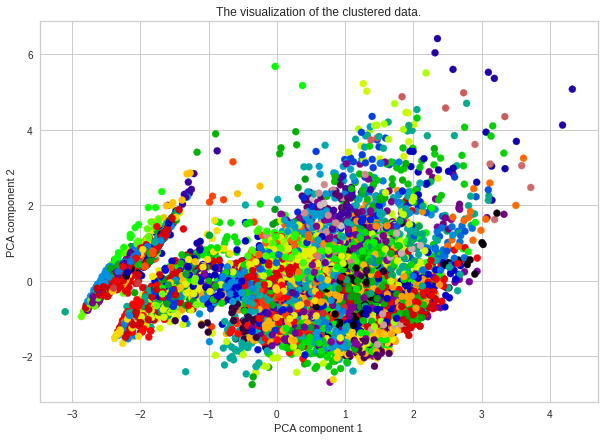

In [106]:
# visualize the clustering result
colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
#ax = plt.gca()
fig_dims = (10,7)
fig, ax = plt.subplots(figsize = fig_dims) 
plt.scatter(cat_pca[0], cat_pca[1], c = colors)
ax.set_title('The visualization of the clustered data.')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2');

From above it is seen that Silhouette Coefficient score is o.328 which is not that well and estimated number of clusters are 226 which is not possible to account. so I will try some diffrent clustering models.

## **Agglomerative Clustering**

In [107]:
# create a function to implement and to get the visualization of the score
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 10)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,              # define the model and parameters
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)                                 # fit the data on model to cluster

        silhouette_avg = silhouette_score(X, cluster_labels)                      # to get the silhouette score
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 15
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')              # visualize the results
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'cyan', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2441228569743971
For n_clusters = 3 The average silhouette_score is : 0.21126590682044
For n_clusters = 4 The average silhouette_score is : 0.19909364882990382
For n_clusters = 5 The average silhouette_score is : 0.21178286931790974
For n_clusters = 6 The average silhouette_score is : 0.20539090839061896
For n_clusters = 7 The average silhouette_score is : 0.1779430175781358
For n_clusters = 8 The average silhouette_score is : 0.1805024385865539
For n_clusters = 9 The average silhouette_score is : 0.17432764989584748
For n_clusters = 10 The average silhouette_score is : 0.1755178245101946
For n_clusters = 11 The average silhouette_score is : 0.17678711380382175
For n_clusters = 12 The average silhouette_score is : 0.17251127770874344
For n_clusters = 13 The average silhouette_score is : 0.15601633340015855
For n_clusters = 14 The average silhouette_score is : 0.15472717370303876
For n_clusters = 15 The average silhouette_score is :

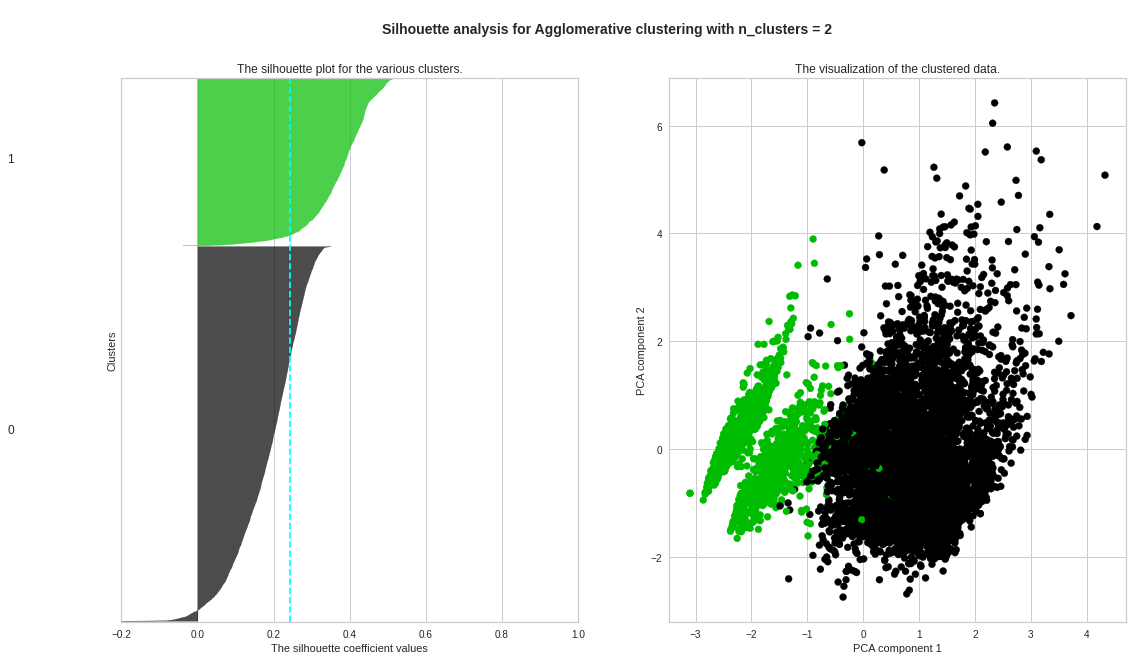

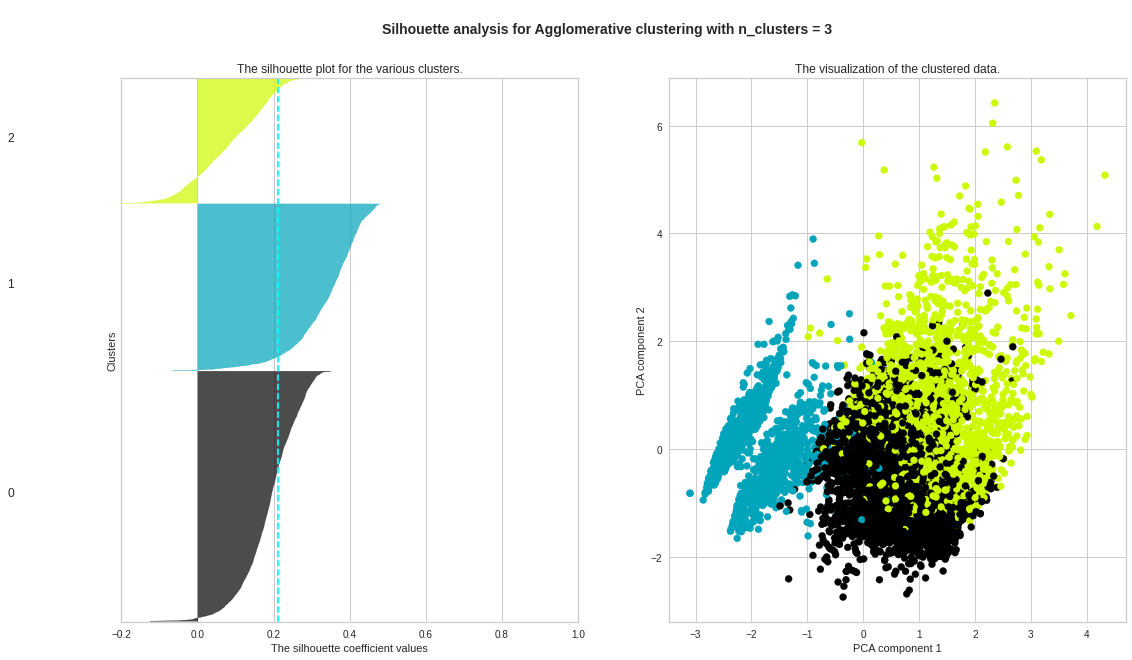

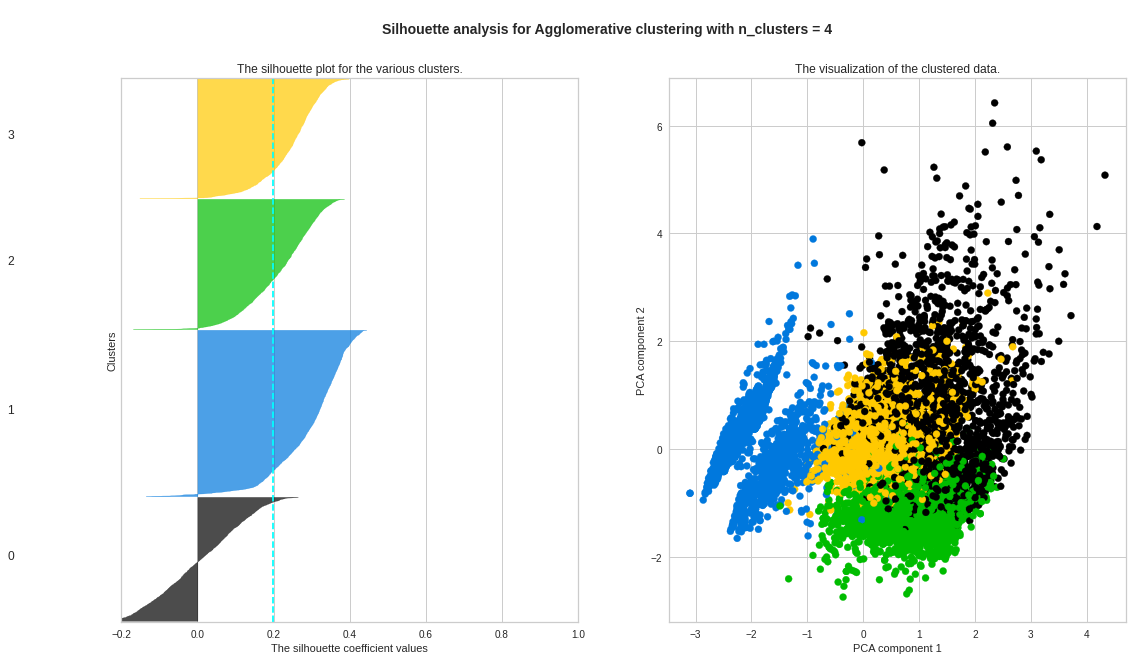

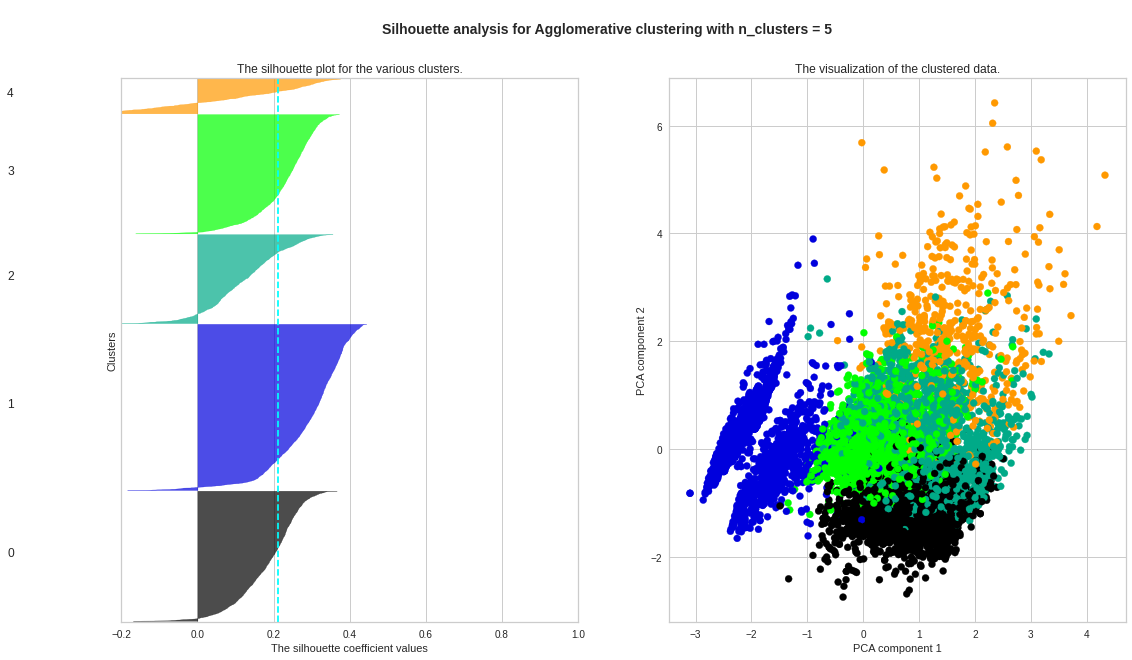

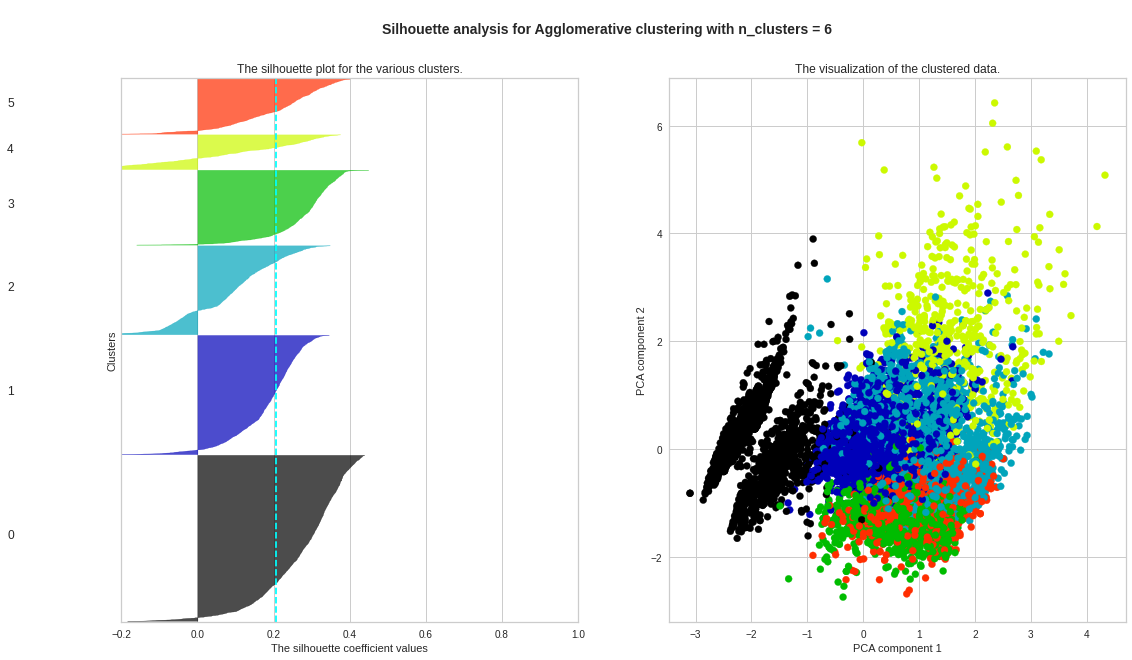

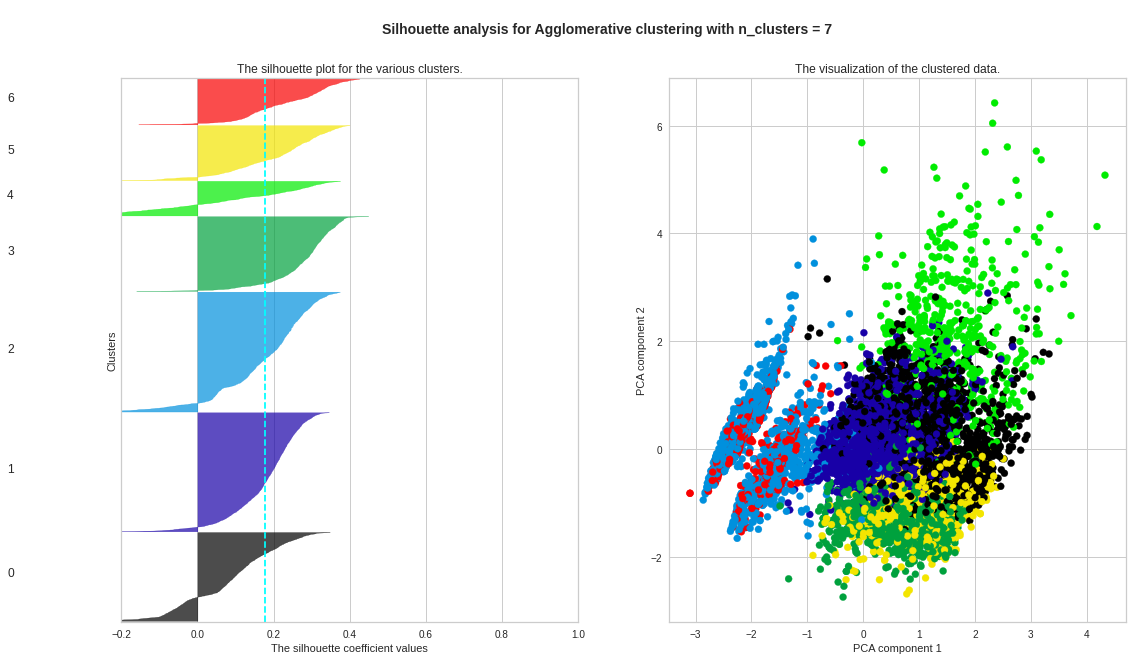

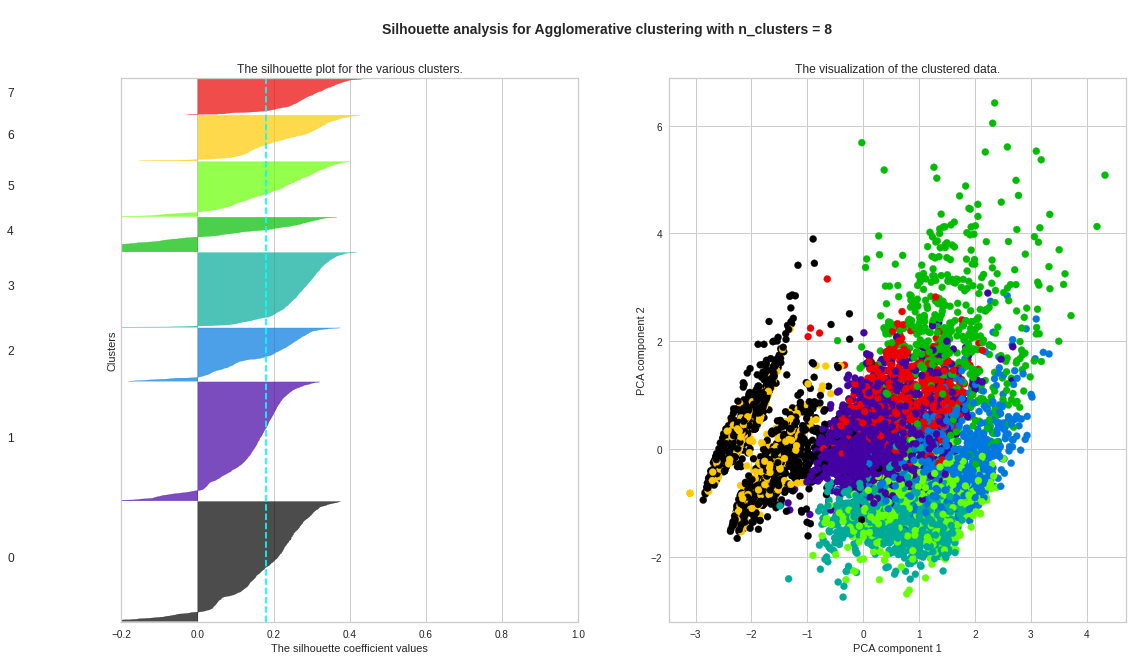

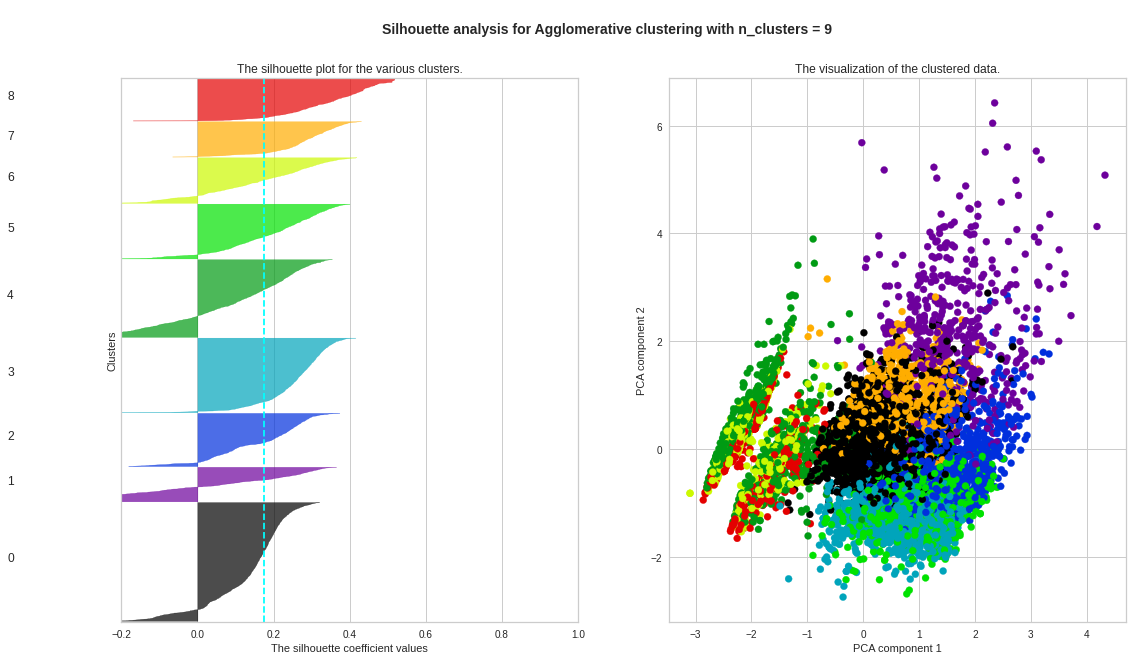

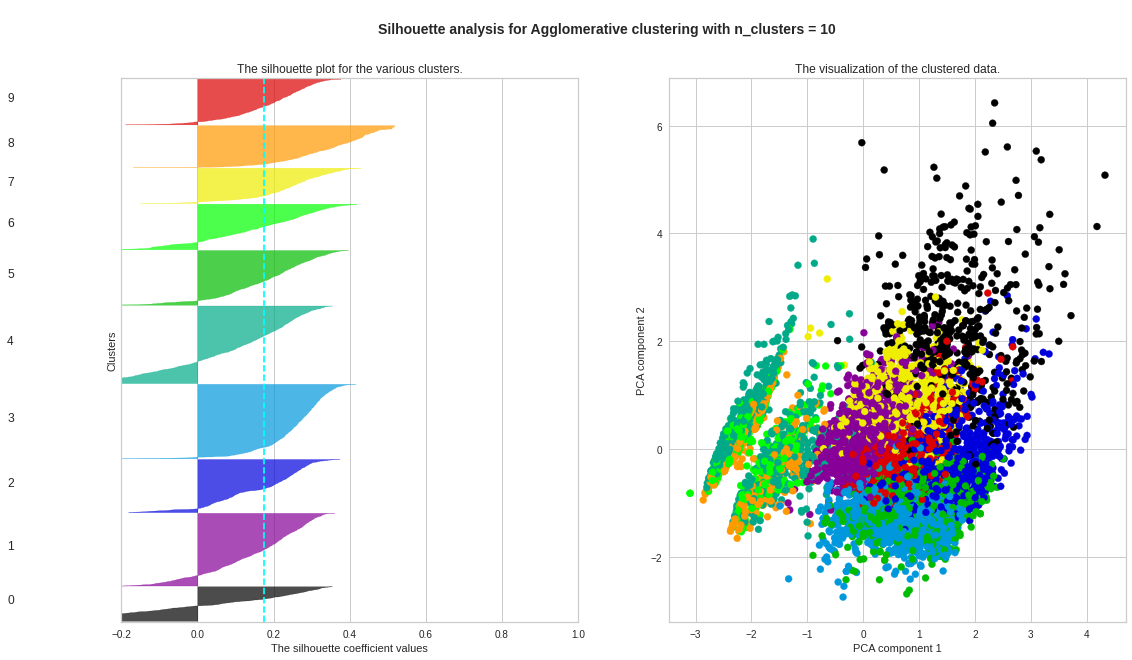

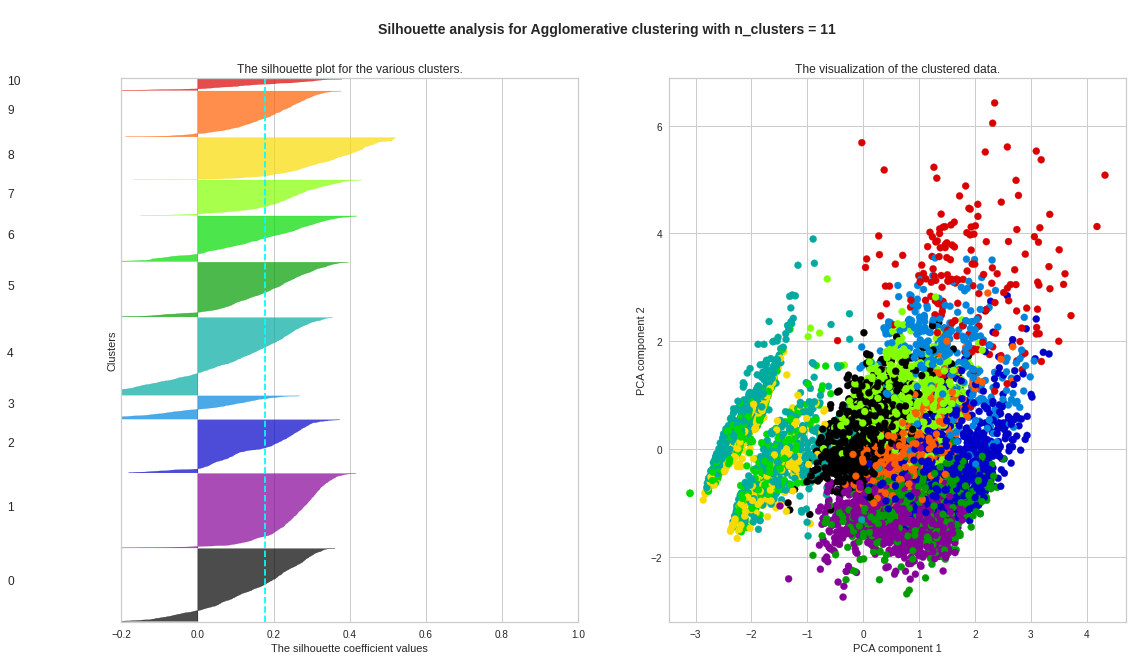

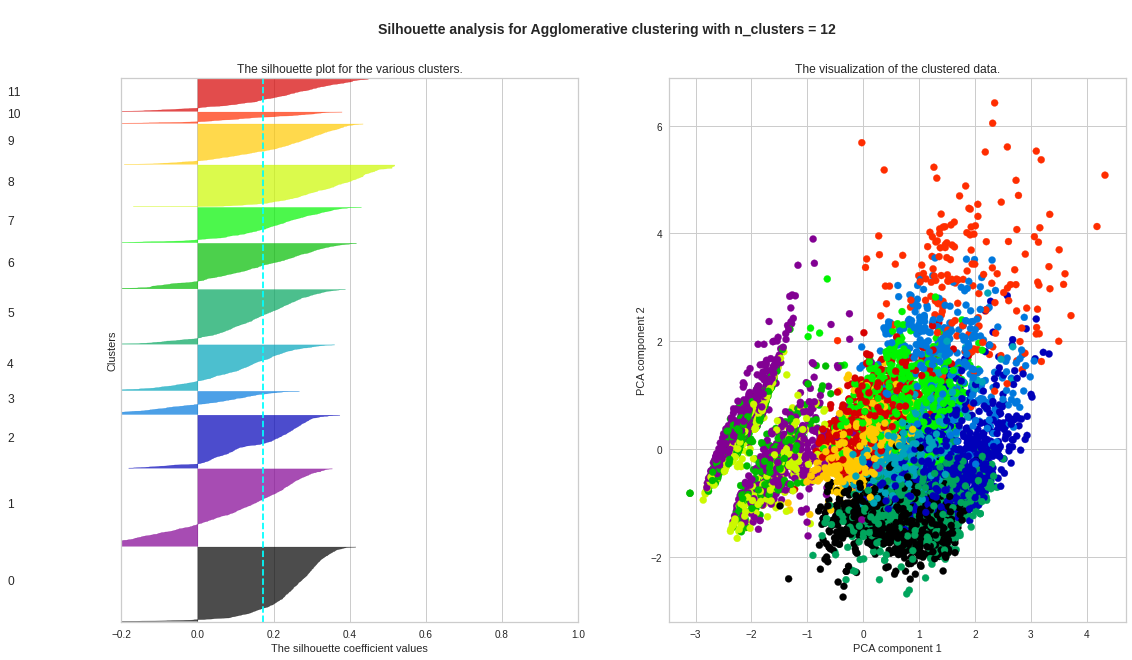

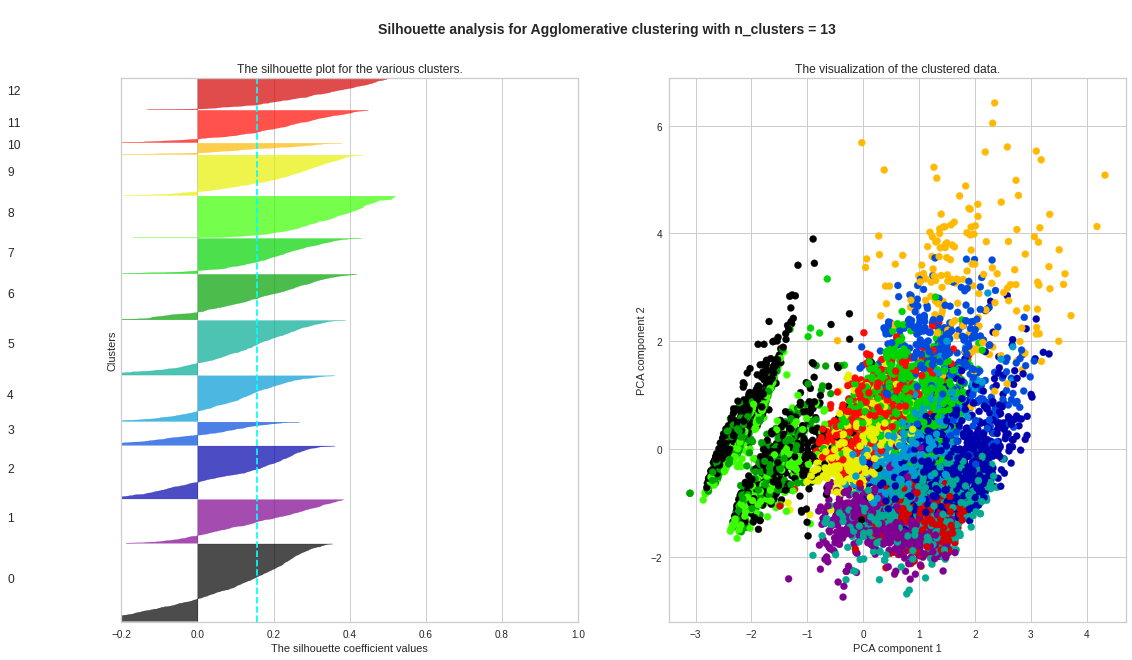

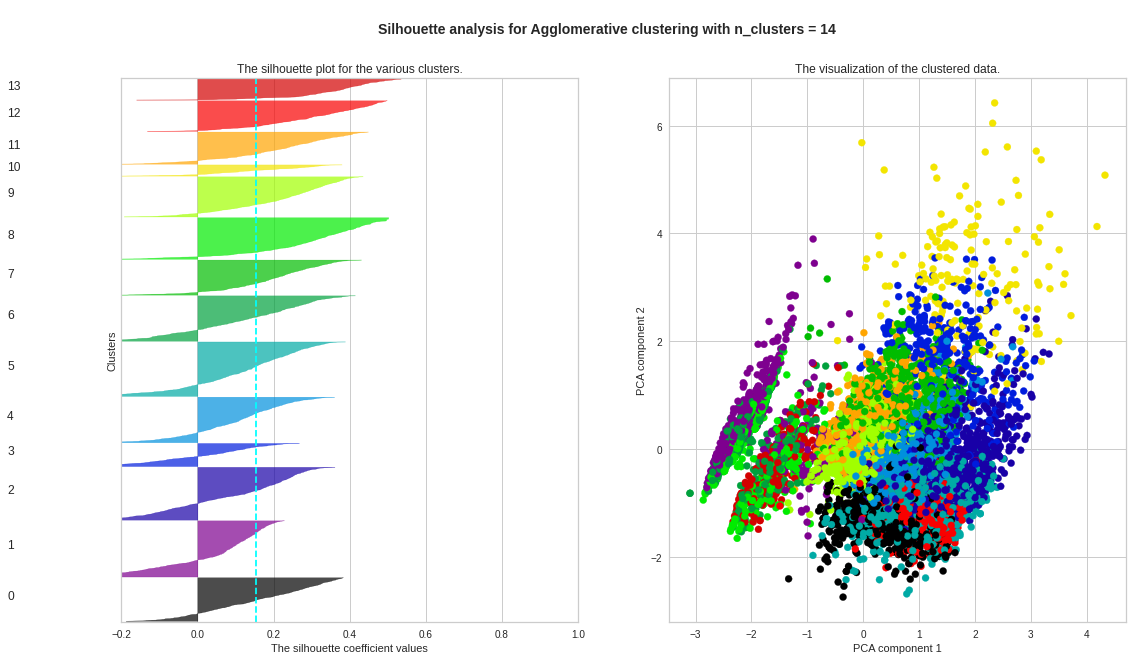

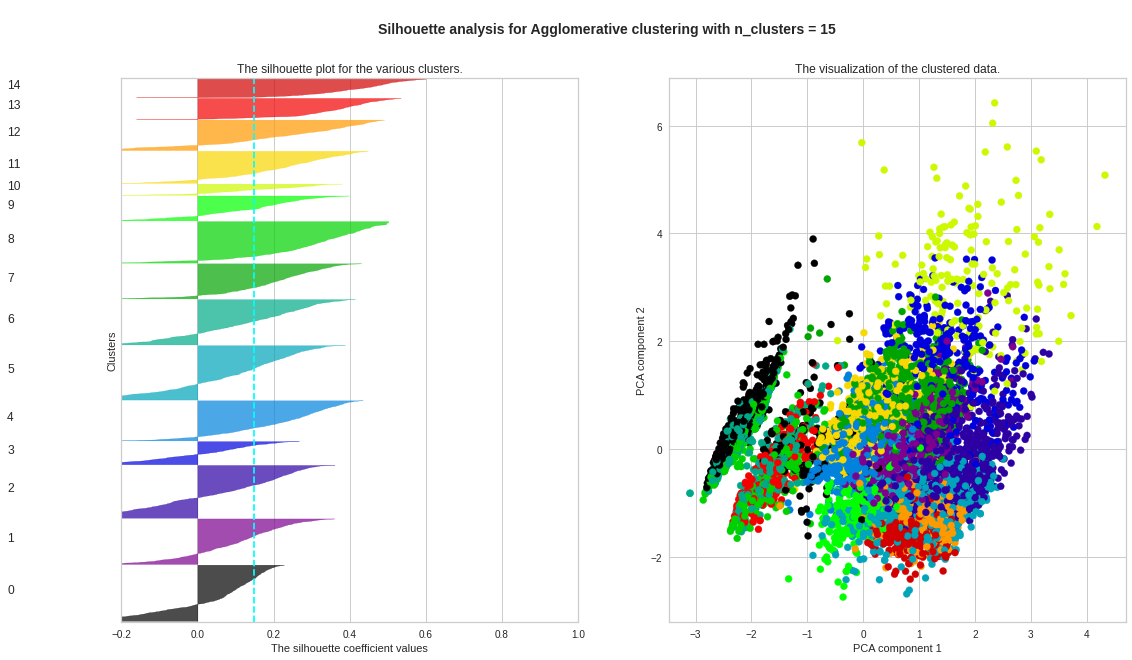

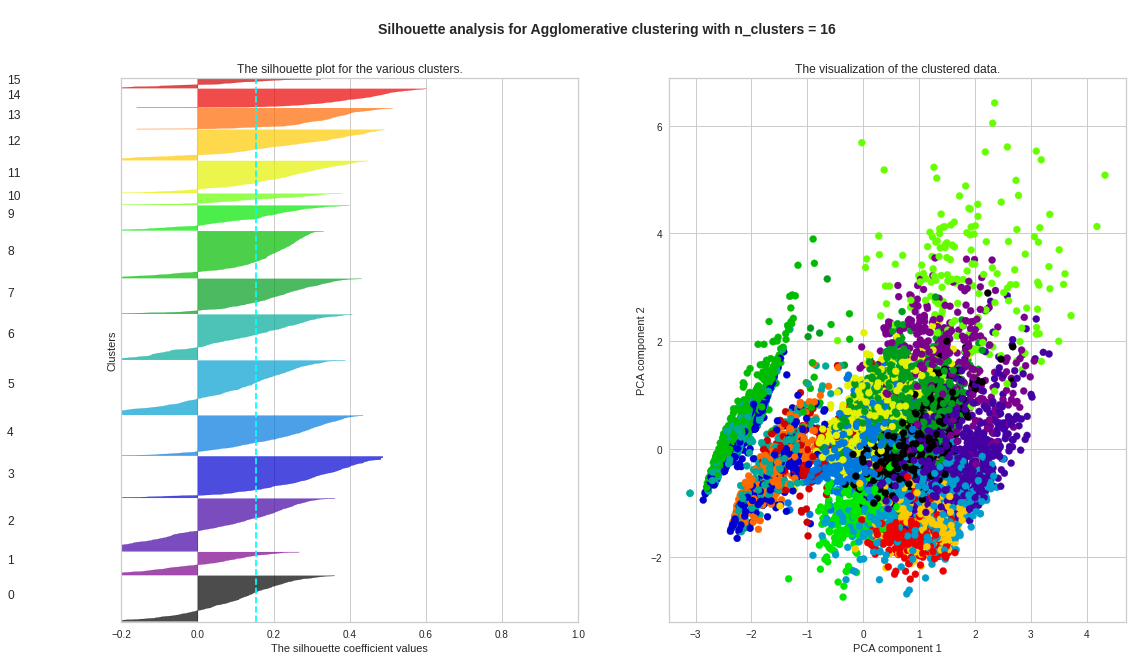

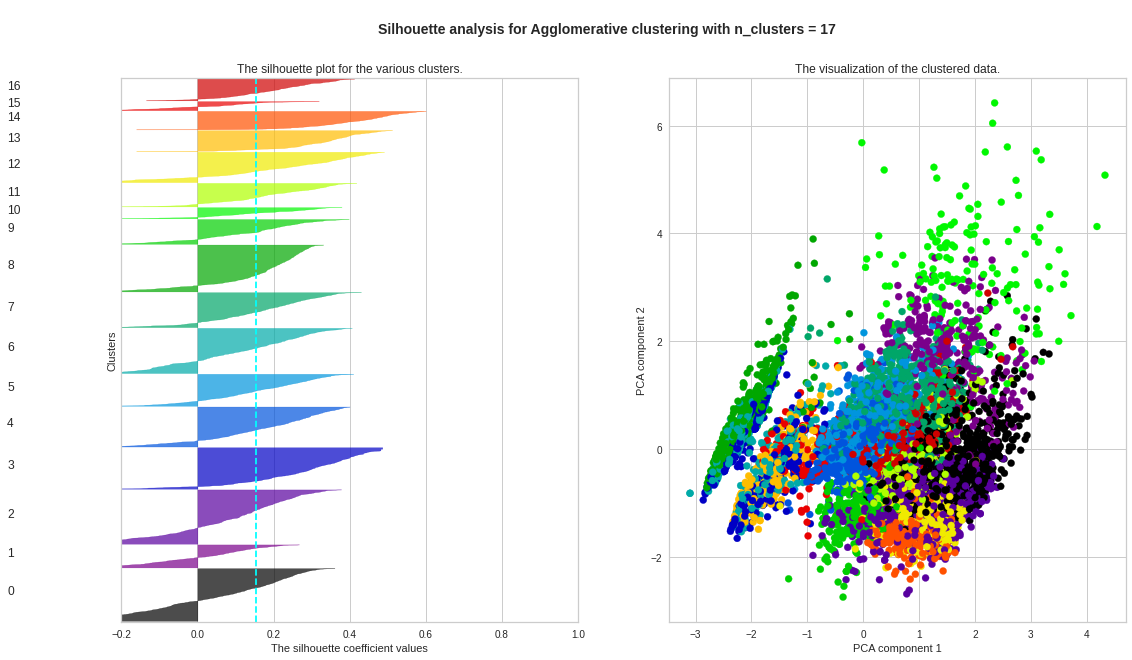

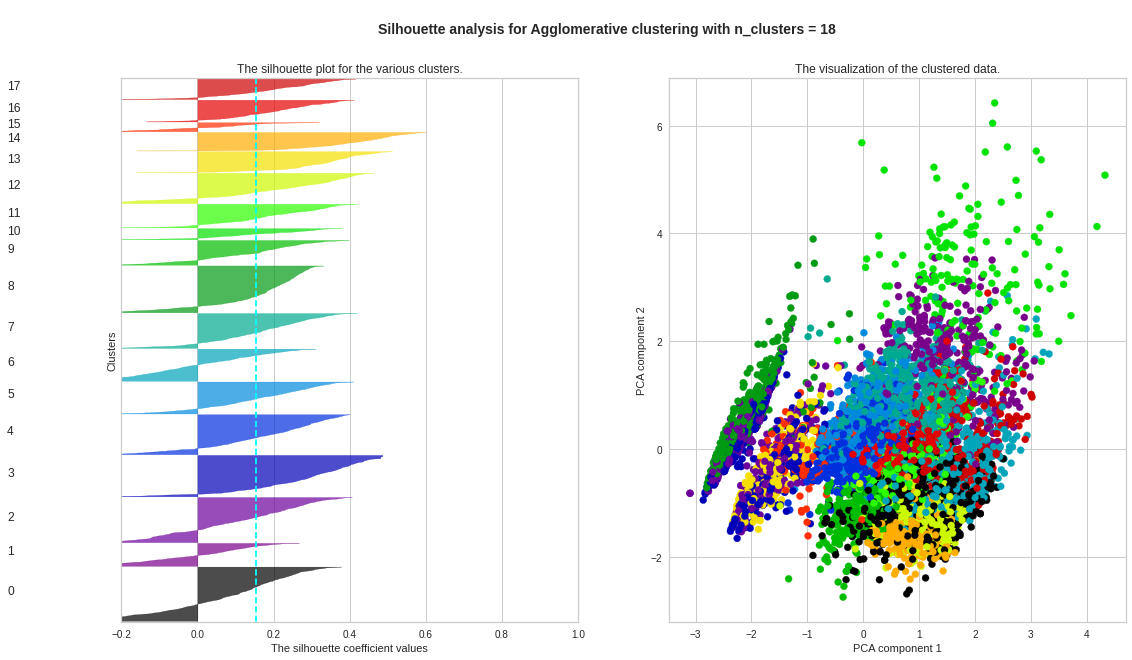

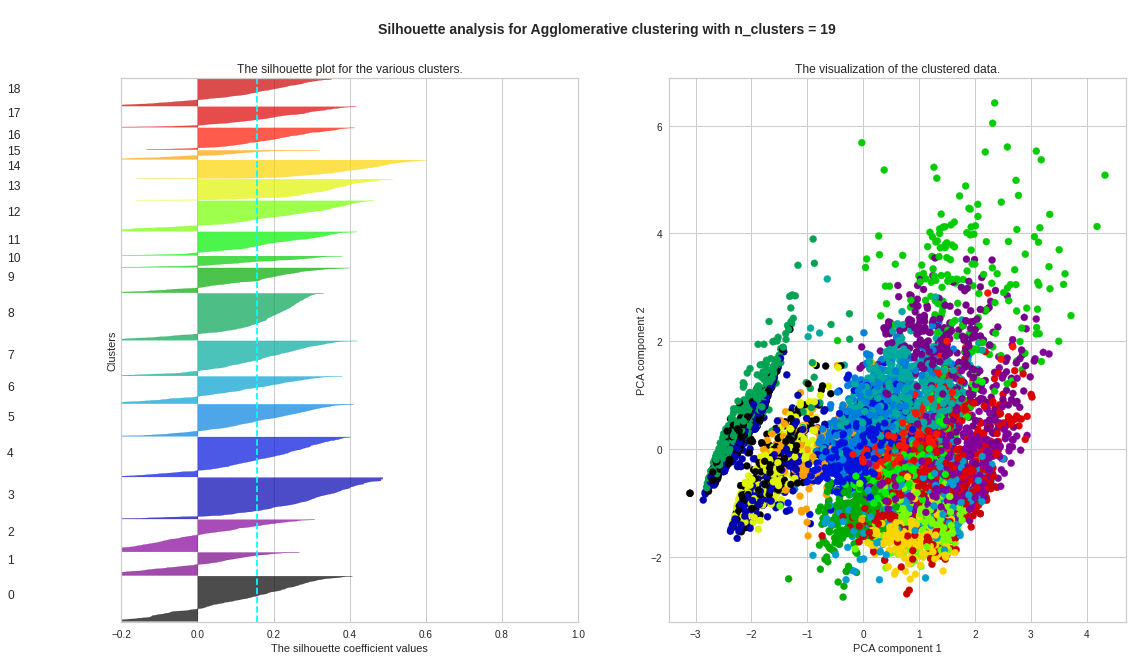

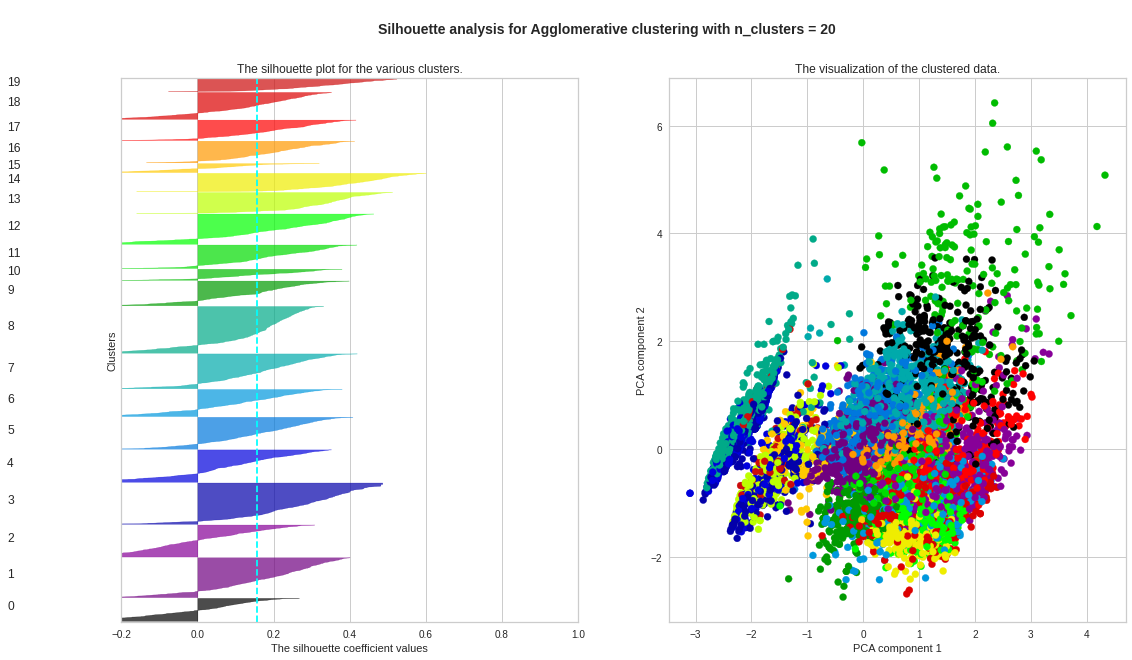

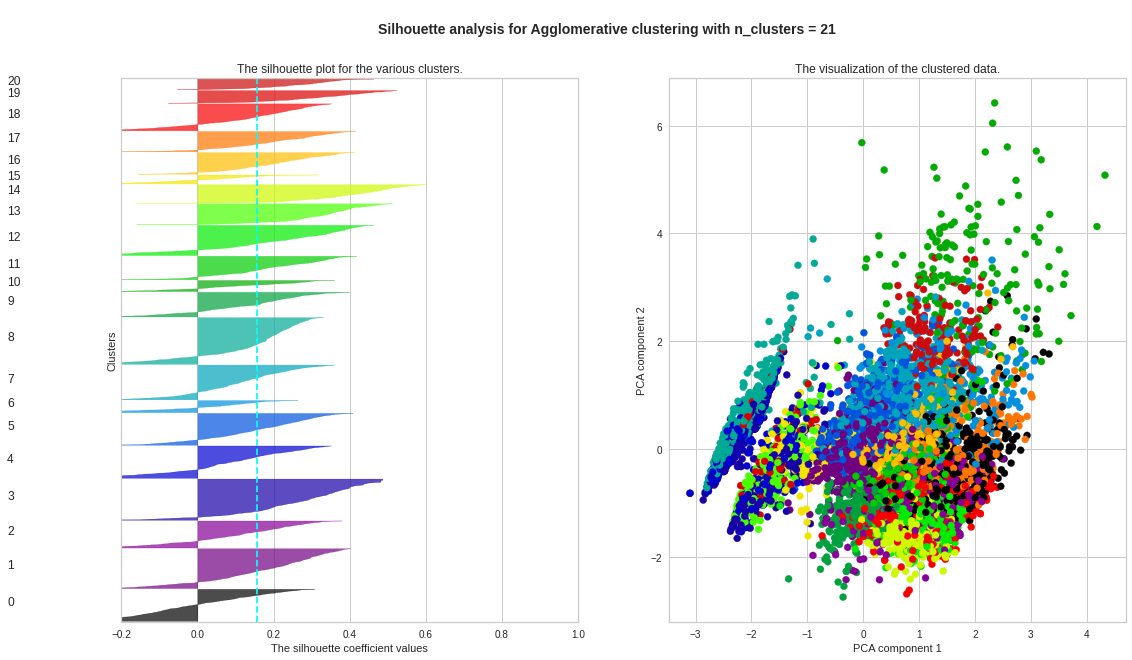

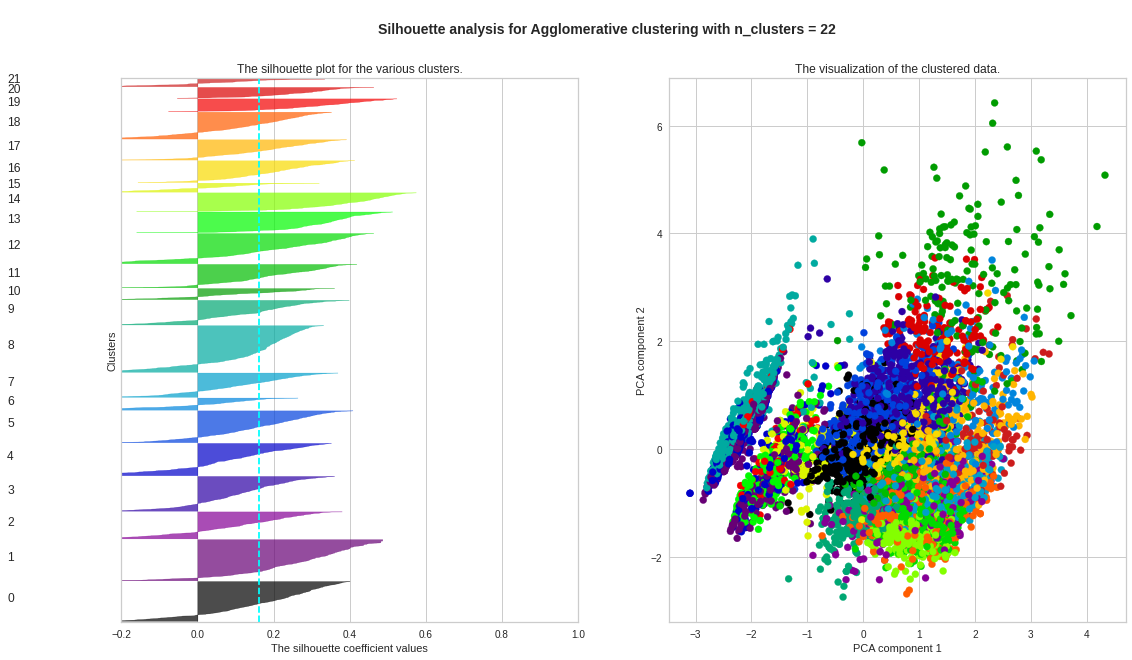

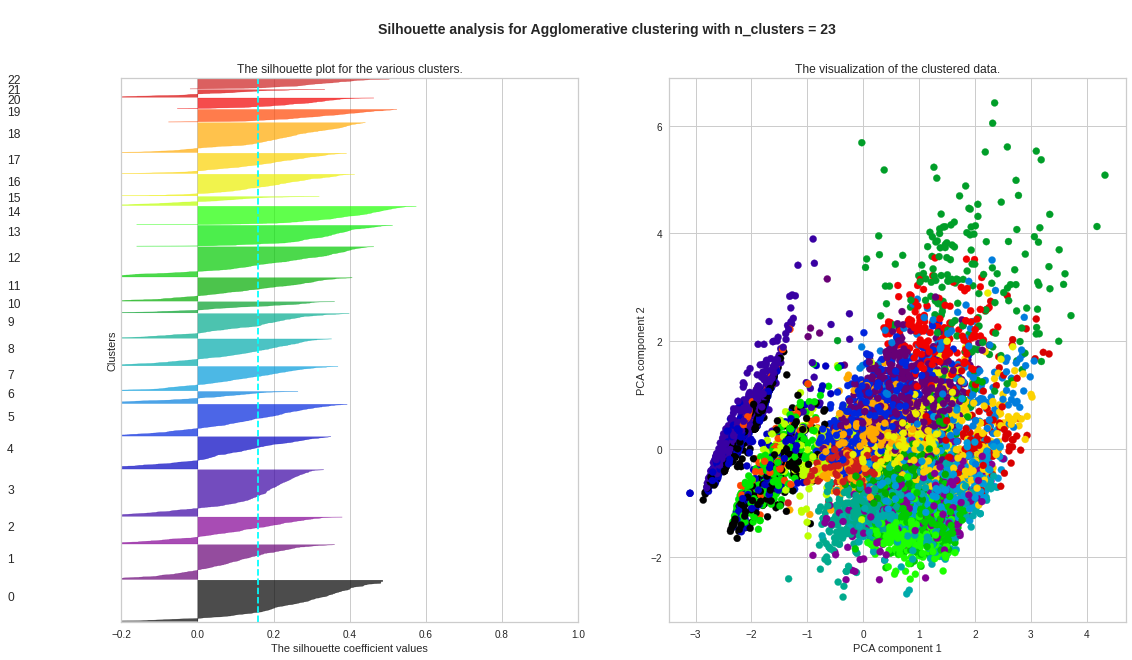

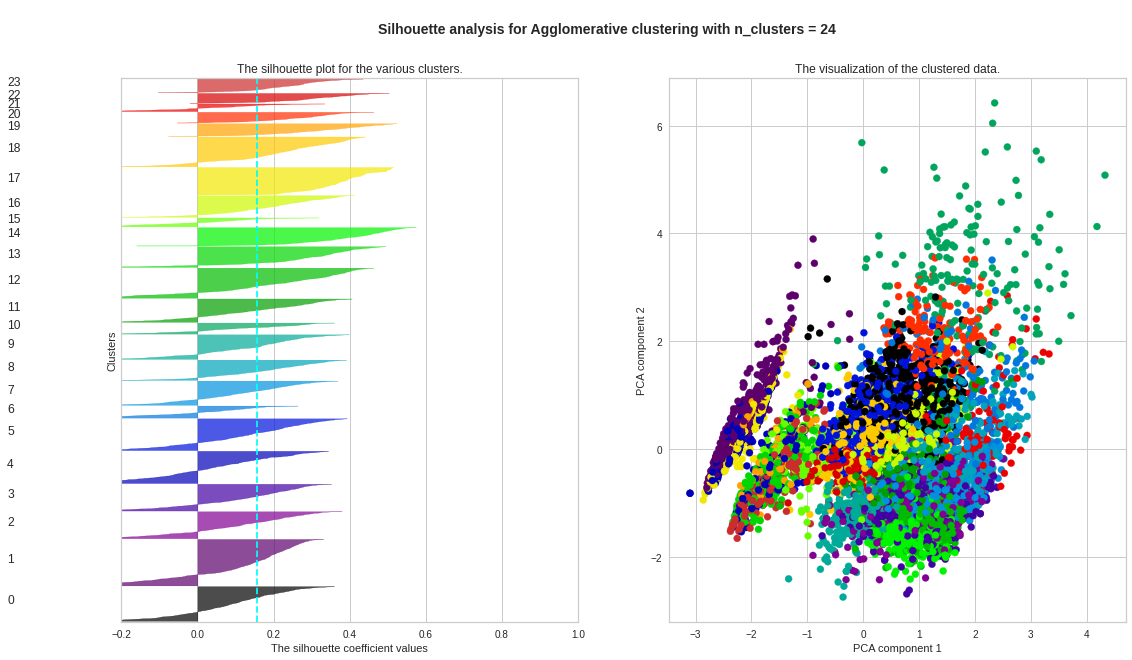

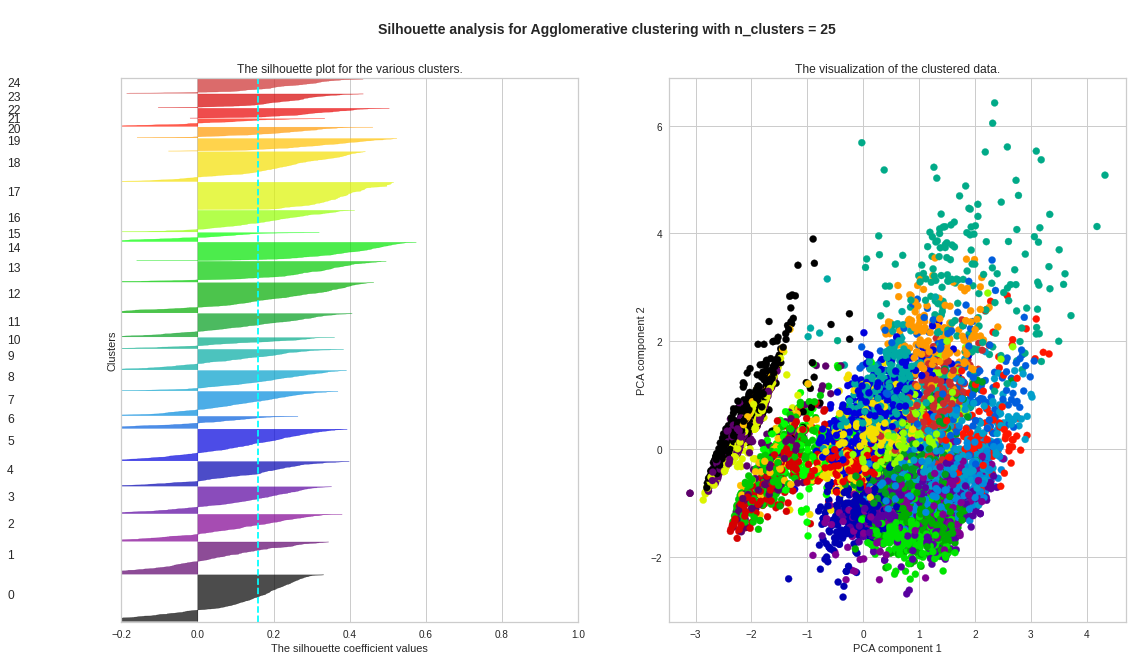

In [108]:
# call the function
silhouette_analysis(np.array(cat_scaled_df),cat_pca,range(2,26))

It seems that both the above model not doing well as silhoutte score is very less.

# **Conclsion**
---

In exploratory data analysis, I found that :
* There are almost 70% of movies and 30% of TV shows listed on Netflix.
* For the mature audience(MA), there is much more movie content than TV shows. For the younger audience (under the age of 17), it is similar, though there are more movies than TV shows.
* Overall, there is much more content that comes from the United States (52 %) and India (18 %).
* The majority of films are released during the holiday season, i.e., January, October, November, and December, and there has been consistent growth since 2014.
* In the case of genres, international movies take a peak and are followed by dramas and comedies.
* Most of the movies listed on Netflix are about 90 minutes long, which seems to make sense, whereas most TV shows have one season.
* "Jan Suter" directed most of the movies. As stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well. Anupam Kher is cast in most of the films.


In clustering, I clustered the data on the basis of the two types because most of the audience chose the film based on the description and type (genres) of the movie or either the cast of the film or the availability of the time. So I have grouped the features into two parts to cluster the data for a better recommendation. 
* It seems that the K-mean cluster's silhouette score gives the highest score For 25 topics, the cluster and elbow methods yield a maximum of 15 topics.
*  Gaussian mixture models-AIC score seems to hint at the 25 topics.
*  If we rely on the LDA-coherence score, k = 12 is the highest.
* As I clustered the categorical data using the Affinity Propagation Model and Agglomerative Model, they didn't perform well and gave the worst clustering result. 


As a result, we will simulate data from **25 latent/hidden topics** while accounting for all scores. 